In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
import math

In [2]:
from scipy import stats

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [5]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH',]#'MIN', ]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [6]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [7]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = '../results/final/het'

In [8]:
os.listdir(dpath)

['cleanup_stats_monte_het_extend_OVERFLOW-ROS-EXOENZYME.csv',
 'versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH.csv',
 'monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH_clean_df.csv.gz',
 'cleanup_stats_monte_het_extend_EXOENZYME.csv',
 'cleanup_stats_monte_het_multi.csv',
 'monte_het_extend_100per_vpro_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_clean_df.csv.gz',
 'monte_het_round2_100per_vpro_ROS_clean_df.csv.gz',
 'monte_het_extend_OVERFLOW_clean_df.csv.gz',
 'versatile_vpros_monte_het_extend_EXOENZYME-MIXOTROPH.csv',
 'monte_het_add_100per_vpro_EXOENZYME_clean_sum.csv.gz',
 'versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME.csv',
 'predicted_classes_monte_het_add_100per_vpro_ROS.csv.gz',
 'monte_het_extend_100per_vpro_MIXOTROPH_clean_sum.csv.gz',
 'versatile_vpros_monte_het_extend_100per_vpro_MIXOTROPH.csv',
 'monte_het_add_100per_vpro_ROS_clean_df.csv.gz',
 'versatile_vpros_monte_het_extend_OVERFLOW.csv',
 'predicted_classes_monte_het_extend_ROS-MIXOTROPH-OVERFLOW-EXOENZYME.csv.

In [9]:
fnames_predicted_classes = [
    'predicted_classes_monte_add_het_clean.csv.gz',
    'predicted_classes_monte_het_clean.csv.gz',
    'predicted_classes_monte_het_add_100per_vpro_EXOENZYME.csv.gz',
    'predicted_classes_monte_het_add_100per_vpro_OVERFLOW.csv.gz',
    'predicted_classes_monte_het_add_100per_vpro_ROS.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_EXOENZYME.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_MIXOTROPH.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_OVERFLOW.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_ROS.csv.gz',
    'predicted_classes_monte_het_extend_EXOENZYME.csv.gz',
    'predicted_classes_monte_het_extend_MIXOTROPH.csv.gz',
    'predicted_classes_monte_het_extend_OVERFLOW.csv.gz',
    'predicted_classes_monte_het_extend_ROS.csv.gz',
    'predicted_classes_monte_het_multi.csv.gz',
    'predicted_classes_monte_het_round2_100per_vpro_ROS.csv.gz',
    'predicted_classes_monte_ROS_round2_het.csv.gz',
]

In [10]:
fnames_sum = [
    'monte_add_het_clean_clean_sum.csv.gz',
    'monte_het_add_100per_vpro_EXOENZYME_clean_sum.csv.gz',
    'monte_het_add_100per_vpro_OVERFLOW_clean_sum.csv.gz',
    'monte_het_add_100per_vpro_ROS_clean_sum.csv.gz',
    'monte_het_clean_clean_sum.csv.gz',
    'monte_het_extend_100per_vpro_EXOENZYME_clean_sum.csv.gz',
    'monte_het_extend_100per_vpro_MIXOTROPH_clean_sum.csv.gz',
    'monte_het_extend_100per_vpro_OVERFLOW_clean_sum.csv.gz',
    'monte_het_extend_100per_vpro_ROS_clean_sum.csv.gz',
    'monte_het_extend_EXOENZYME_clean_sum.csv.gz',
    'monte_het_extend_MIXOTROPH_clean_sum.csv.gz',
    'monte_het_extend_OVERFLOW_clean_sum.csv.gz',
    'monte_het_extend_ROS_clean_sum.csv.gz',
    'monte_het_multi_clean_sum.csv.gz',
    'monte_het_round2_100per_vpro_ROS_clean_sum.csv.gz',
    'monte_ROS_round2_het_clean_sum.csv.gz',
]

In [11]:
sum_df = pd.concat([pd.read_csv(os.path.join(dpath, f)) for f in fnames_sum], ignore_index=True)
#sum_df = sum_df.loc[sum_df.model.]

In [12]:
sum_df = sum_df.drop(columns=['Unnamed: 0'])

In [13]:
minmse_df = pd.concat([pd.read_csv(os.path.join(dpath, f)) for f in fnames_predicted_classes], ignore_index=True)



In [14]:
vpro_df = pd.read_csv('../ML_model/versatile_vpros.csv')

In [15]:
minmse_df.VPRO = minmse_df.VPRO.str.replace('_monte_', '' ,regex=False)

In [16]:
minmse_df = minmse_df.loc[minmse_df.model.isin(morder)]

In [17]:
vpro_df = vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile]

In [18]:
minmse_df.columns, vpro_df.columns

(Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
        'hash', 'VPRO', 'Unnamed: 0', 'Sample', 'full name', 'Group',
        'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
        'RMSE_filled'],
       dtype='object'),
 Index(['model', 'Phase', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong',
        'Sustained', 'Weak', 'pos_interaction', 'neg_interaction', 'Versatile',
        'simulations_per_VPRO', 'Versatile_STR', 'MODEL', 'EXOENZYME',
        'OVERFLOW', 'ROS', 'MIXOTROPH', 'MIN', '% positive', 'Versatile_STR_'],
       dtype='object'))

In [19]:
df = pd.merge(
    vpro_df[['model', 'Phase', 'VPRO', 'Versatile',]],
    minmse_df[['run_id', 'y_pred',  'VPRO', ]],
    on='VPRO', how='left')
df

model   Phase                            VPRO  Versatile  \
0       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
1       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
2       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
3       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
4       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
...           ...     ...                             ...        ...   
108968        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   
108969        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   
108970        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   
108971        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   
108972        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   

                                                   run_id  y_pred  
0       monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...    Weak  
1       monteadd2_EXOENZYME_18_monte_vpro_11_62_EXOENZ...    Weak  
2       monteadd2_EXOENZYME_20_monte_vpro_11_62_EXOENZ...    Weak  
3       monteadd2_EXOENZYME_25_monte_vpro_11_62_EXOENZ...    Weak  
4       monteadd2_EXOENZYME_25_monte_vpro_11_62_EXOENZ...    Weak  
...                                                   ...     ...  
108968  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...   Other  
108969  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...  Strong  
108970  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...   Other  
108971  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...  Strong  
108972  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...  Strong  

[108973 rows x 6 columns]

In [20]:
df.isna().sum()

model        0
Phase        0
VPRO         0
Versatile    0
run_id       0
y_pred       0
dtype: int64

In [21]:
df.Versatile.value_counts()

Versatile
True    108973
Name: count, dtype: int64

In [22]:
df = pd.merge(df, sum_df, on='run_id', how='left')

In [23]:
df

model   Phase                            VPRO  Versatile  \
0       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
1       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
2       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
3       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
4       EXOENZYME     add      vpro_11_62_EXOENZYME_C1_20       True   
...           ...     ...                             ...        ...   
108968        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   
108969        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   
108970        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   
108971        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   
108972        ROS  round2  vpro_2_19_33_ROS_C0_988_92_ROS       True   

                                                   run_id  y_pred   VmaxICp  \
0       monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...    Weak  0.000055   
1       monteadd2_EXOENZYME_18_monte_vpro_11_62_EXOENZ...    Weak  0.000055   
2       monteadd2_EXOENZYME_20_monte_vpro_11_62_EXOENZ...    Weak  0.000055   
3       monteadd2_EXOENZYME_25_monte_vpro_11_62_EXOENZ...    Weak  0.000055   
4       monteadd2_EXOENZYME_25_monte_vpro_11_62_EXOENZ...    Weak  0.000055   
...                                                   ...     ...       ...   
108968  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...   Other  0.000033   
108969  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...  Strong  0.000033   
108970  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...   Other  0.000033   
108971  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...  Strong  0.000033   
108972  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...  Strong  0.000033   

        VmaxICh   VmaxINp   VmaxINh  ...  Koverflowh  ROSMode     KprodROSp  \
0           0.0  0.000042  0.000022  ...         0.0      0.0  0.000000e+00   
1           0.0  0.000042  0.000131  ...         0.0      0.0  0.000000e+00   
2           0.0  0.000042  0.000067  ...         0.0      0.0  0.000000e+00   
3           0.0  0.000042  0.000041  ...         0.0      0.0  0.000000e+00   
4           0.0  0.000042  0.000024  ...         0.0      0.0  0.000000e+00   
...         ...       ...       ...  ...         ...      ...           ...   
108968      0.0  0.000020  0.000178  ...         0.0      1.0  3.023700e-08   
108969      0.0  0.000020  0.000067  ...         0.0      1.0  3.023700e-08   
108970      0.0  0.000020  0.000043  ...         0.0      1.0  3.023700e-08   
108971      0.0  0.000020  0.000067  ...         0.0      1.0  3.023700e-08   
108972      0.0  0.000020  0.000350  ...         0.0      1.0  3.023700e-08   

           KprodROSh     KlossROSp  KlossROSh  KdecayROS    omegaP  \
0       0.000000e+00  0.000000e+00   0.000000   0.000000  0.000000   
1       0.000000e+00  0.000000e+00   0.000000   0.000000  0.000000   
2       0.000000e+00  0.000000e+00   0.000000   0.000000  0.000000   
3       0.000000e+00  0.000000e+00   0.000000   0.000000  0.000000   
4       0.000000e+00  0.000000e+00   0.000000   0.000000  0.000000   
...              ...           ...        ...        ...       ...   
108968  4.603992e-08  3.316511e-07   0.000006   0.000003  0.000034   
108969  3.251041e-09  3.316511e-07   0.000015   0.000003  0.000034   
108970  1.944444e-08  3.316511e-07   0.000010   0.000003  0.000034   
108971  1.170663e-08  3.316511e-07   0.000015   0.000003  0.000034   
108972  1.349176e-08  3.316511e-07   0.000010   0.000003  0.000034   

              omegaH   ROSmaxD  
0       0.000000e+00  0.000000  
1       0.000000e+00  0.000000  
2       0.000000e+00  0.000000  
3       0.000000e+00  0.000000  
4       0.000000e+00  0.000000  
...              ...       ...  
108968  3.405556e-08  0.000032  
108969  3.405556e-08  0.000032  
108970  3.405556e-08  0.000032  
108971  6.562174e-08  0.000032  
108972  8.941167e-08  0.000032  

[108973 row

In [24]:
df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'VmaxICp',
       'VmaxICh', 'VmaxINp', 'VmaxINh', 'VmaxOCp', 'VmaxOCh', 'VmaxONp',
       'VmaxONh', 'KICp', 'KICh', 'KINp', 'KINh', 'KOCp', 'KOCh', 'KONp',
       'KONh', 'Mp', 'Mh', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'QCmaxp',
       'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp', 'Kmtbh', 'bp', 'bh', 'r0p',
       'r0h', 'KdecayDON', 'KprodEXOp', 'KprodEXOh', 'OverflowMode',
       'Koverflowp', 'Koverflowh', 'ROSMode', 'KprodROSp', 'KprodROSh',
       'KlossROSp', 'KlossROSh', 'KdecayROS', 'omegaP', 'omegaH', 'ROSmaxD'],
      dtype='object')

In [25]:
df['model'].value_counts()

model
OVERFLOW     42014
ROS          39963
EXOENZYME    26682
MIXOTROPH      314
Name: count, dtype: int64

In [26]:
id_vars=[
    'run_id', 'y_pred', 
    'VPRO', 'model', 'Phase', 'Versatile',
       ]
def _get_params_df(model):
    pparams_to_update, pbounds, plog_params = get_param_tuning_values(model, 'PRO')
    hparams_to_update, pbounds, plog_params = get_param_tuning_values(model, 'HET')
    params_to_update = pparams_to_update + hparams_to_update
    param_vals_map = get_param_vals(model)
    
    params_to_update = [p for p in params_to_update if p in df.columns]

    param_vals_df = df.loc[df.model.isin([model]), 
                                id_vars + params_to_update ]
    mparam_vals = param_vals_df.melt( 
        id_vars=id_vars,
        value_name='paramval', 
        var_name='param'
    )    
    mparam_vals['default'] = mparam_vals['param'].map(param_vals_map)
    mparam_vals['FC'] = np.log2(mparam_vals.paramval / mparam_vals.default)

    return mparam_vals
mparams_df = pd.concat([_get_params_df(model) for model in df.model.unique()], ignore_index=True)

In [27]:
mparams_df.describe()

paramval       default            FC
count  1.877366e+06  1.877366e+06  1.877366e+06
mean   4.573607e+00  2.254530e+00  2.993511e-01
std    2.813859e+01  8.628858e+00  1.696173e+00
min    1.946126e-09  4.696017e-09 -3.321927e+00
25%    7.241064e-06  1.956674e-06 -4.668359e-01
50%    6.666667e-05  6.666667e-05  0.000000e+00
75%    1.000000e-01  1.000000e-01  1.825423e+00
max    3.674207e+02  3.700000e+01  3.321924e+00

In [28]:
mparams_df.param.unique()

array(['VmaxICp', 'VmaxINp', 'KICp', 'KINp', 'Mp', 'gammaDp', 'VmaxINh',
       'VmaxOCh', 'VmaxONh', 'KINh', 'KOCh', 'KONh', 'Mh', 'gammaDh',
       'KprodEXOh', 'VmaxOCp', 'VmaxONp', 'KOCp', 'KONp', 'Koverflowp',
       'Koverflowh', 'KprodROSp', 'KlossROSp', 'omegaP', 'KprodROSh',
       'KlossROSh', 'omegaH'], dtype=object)

In [29]:
mparams_df.dtypes

run_id        object
y_pred        object
VPRO          object
model         object
Phase         object
Versatile       bool
param         object
paramval     float64
default      float64
FC           float64
dtype: object

In [30]:
mparams_df['param1'] = mparams_df.param.str[:-1]

In [31]:
mparams_df['Strain'] = mparams_df.param.str[-1].map({'p' : 'PRO', 'P': 'PRO', 'h': 'HET', 'H': 'HET'})

In [32]:
mparams_df[['param1', 'y_pred','Strain']]

param1  y_pred Strain
0        VmaxIC    Weak    PRO
1        VmaxIC    Weak    PRO
2        VmaxIC    Weak    PRO
3        VmaxIC    Weak    PRO
4        VmaxIC    Weak    PRO
...         ...     ...    ...
1877361   omega   Other    HET
1877362   omega  Strong    HET
1877363   omega   Other    HET
1877364   omega  Strong    HET
1877365   omega  Strong    HET

[1877366 rows x 3 columns]

In [33]:
#IC is too different to share
mask = mparams_df['param1'].str.endswith(('OC',  'ON', 'IN', 'IC'))

mparams_df.loc[mask, 'paramtype'] = mparams_df.loc[mask, 'param1'].str[:-2]
mparams_df.loc[mask, 'nutrient'] = mparams_df.loc[mask, 'param1'].str[-2:]
mparams_df

run_id  y_pred  \
0        monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...    Weak   
1        monteadd2_EXOENZYME_18_monte_vpro_11_62_EXOENZ...    Weak   
2        monteadd2_EXOENZYME_20_monte_vpro_11_62_EXOENZ...    Weak   
3        monteadd2_EXOENZYME_25_monte_vpro_11_62_EXOENZ...    Weak   
4        monteadd2_EXOENZYME_25_monte_vpro_11_62_EXOENZ...    Weak   
...                                                    ...     ...   
1877361  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...   Other   
1877362  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...  Strong   
1877363  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...   Other   
1877364  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...  Strong   
1877365  monte_ROS_round2_het_monte_vpro_2_19_33_ROS_C0...  Strong   

                                   VPRO      model   Phase  Versatile  \
0            vpro_11_62_EXOENZYME_C1_20  EXOENZYME     add       True   
1            vpro_11_62_EXOENZYME_C1_20  EXOENZYME     add       True   
2            vpro_11_62_EXOENZYME_C1_20  EXOENZYME     add       True   
3            vpro_11_62_EXOENZYME_C1_20  EXOENZYME     add       True   
4            vpro_11_62_EXOENZYME_C1_20  EXOENZYME     add       True   
...                                 ...        ...     ...        ...   
1877361  vpro_2_19_33_ROS_C0_988_92_ROS        ROS  round2       True   
1877362  vpro_2_19_33_ROS_C0_988_92_ROS        ROS  round2       True   
1877363  vpro_2_19_33_ROS_C0_988_92_ROS        ROS  round2       True   
1877364  vpro_2_19_33_ROS_C0_988_92_ROS        ROS  round2       True   
1877365  vpro_2_19_33_ROS_C0_988_92_ROS        ROS  round2       True   

           param      paramval       default        FC  param1 Strain  \
0        VmaxICp  5.524308e-05  5.555556e-06  3.313791  VmaxIC    PRO   
1        VmaxICp  5.524308e-05  5.555556e-06  3.313791  VmaxIC    PRO   
2        VmaxICp  5.524308e-05  5.555556e-06  3.313791  VmaxIC    PRO   
3        VmaxICp  5.524308e-05  5.555556e-06  3.313791  VmaxIC    PRO   
4        VmaxICp  5.524308e-05  5.555556e-06  3.313791  VmaxIC    PRO   
...          ...           ...           ...       ...     ...    ...   
1877361   omegaH  3.405556e-08  3.405556e-08  0.000000   omega    HET   
1877362   omegaH  3.405556e-08  3.405556e-08  0.000000   omega    HET   
1877363   omegaH  3.405556e-08  3.405556e-08  0.000000   omega    HET   
1877364   omegaH  6.562174e-08  3.405556e-08  0.946284   omega    HET   
1877365   omegaH  8.941167e-08  3.405556e-08  1.392573   omega    HET   

        paramtype nutrient  
0            Vmax       IC  
1            Vmax       IC  
2            Vmax       IC  
3            Vmax       IC  
4            Vmax       IC  
...           ...      ...  
1877361       NaN      NaN  
1877362       NaN      NaN  
1877363       NaN      NaN  
1877364       NaN      NaN  
1877365       NaN      NaN  

[1877366 rows x 14 columns]

In [34]:
mparams_df.columns

Index(['run_id', 'y_pred', 'VPRO', 'model', 'Phase', 'Versatile', 'param',
       'paramval', 'default', 'FC', 'param1', 'Strain', 'paramtype',
       'nutrient'],
      dtype='object')

In [35]:
mparams_df.param1.unique()

array(['VmaxIC', 'VmaxIN', 'KIC', 'KIN', 'M', 'gammaD', 'VmaxOC',
       'VmaxON', 'KOC', 'KON', 'KprodEXO', 'Koverflow', 'KprodROS',
       'KlossROS', 'omega'], dtype=object)

In [36]:
params_per_sec = [
    'VmaxIN', 'VmaxOC', 'VmaxON', 'VmaxIC', 'M', 
    'KprodEXO', 'Koverflow', 'KprodROS',
       'KlossROS', 'omega'
]
mask = mparams_df.param1.isin(params_per_sec)
mparams_df.loc[mask, 'paramval'] = mparams_df.loc[mask, 'paramval'] * seconds_in_day

## check to see if strong distribution is different than all non-strong

In [37]:
mparams_df.columns

Index(['run_id', 'y_pred', 'VPRO', 'model', 'Phase', 'Versatile', 'param',
       'paramval', 'default', 'FC', 'param1', 'Strain', 'paramtype',
       'nutrient'],
      dtype='object')

In [38]:
def _compute_ks(v, model, pos_ypred):
    base_df = mparams_df.loc[mparams_df.param.isin([v]) & mparams_df.model.isin([model])]
    mask = base_df.y_pred.isin(pos_ypred)
    pos_runs = base_df.loc[ mask, 'FC']
    other_runs = base_df.loc[~mask, 'FC']
    pvalue=None 
    Kstest_statistic=None
    different_dist=None
    if pos_runs.shape[0] and other_runs.shape[0]:
        ks_res = stats.ks_2samp(pos_runs, other_runs)
        pvalue=ks_res.pvalue 
        Kstest_statistic=ks_res.statistic
        different_dist=ks_res.pvalue<=0.05
        
    return dict(
        param=v, 
        model=model, 
        subset=','.join(pos_ypred), 
        pvalue=pvalue, 
        Kstest_statistic=Kstest_statistic, 
        different_dist=different_dist,
        Strain = base_df['Strain'].unique()[0],
    )

ks_df = pd.DataFrame([
    _compute_ks(v, model, pos_ypred) 
    for model in morder
    for pos_ypred in [['Strong'], ['Sustained'], ['Strong', 'Sustained'],]
    for v in mparams_df.loc[mparams_df.model.isin([model])].param.unique()
]).dropna().sort_values('pvalue').reset_index(drop=True)


In [39]:
ks_df

param      model            subset    pvalue  Kstest_statistic  \
0    KlossROSh        ROS            Strong  0.000000          0.344373   
1           Mh   OVERFLOW         Sustained  0.000000          0.556642   
2      gammaDh  EXOENZYME         Sustained  0.000000          0.601651   
3           Mh  EXOENZYME         Sustained  0.000000          0.457252   
4      gammaDp        ROS  Strong,Sustained  0.000000          0.311554   
..         ...        ...               ...       ...               ...   
184       KONh   OVERFLOW         Sustained  0.889193          0.012293   
185    VmaxOCh   OVERFLOW            Strong  0.939137          0.042727   
186       KOCh   OVERFLOW            Strong  0.952643          0.041373   
187       KONh  EXOENZYME            Strong  0.969812          0.075702   
188       KINh  EXOENZYME            Strong  0.999582          0.054131   

    different_dist Strain  
0             True    HET  
1             True    HET  
2             True    HET  
3             True    HET  
4             True    PRO  
..             ...    ...  
184          False    HET  
185          False    HET  
186          False    HET  
187          False    HET  
188          False    HET  

[189 rows x 7 columns]

In [40]:
t = ks_df.loc[ks_df.different_dist].pivot_table(index='param', columns=['model', 'subset'], values='pvalue', aggfunc='min')
t['minpvalue'] = t.min(axis=1)
t.sort_values(by='minpvalue')

model          EXOENZYME                                       MIXOTROPH  \
subset            Strong Strong,Sustained     Sustained Strong,Sustained   
param                                                                      
Koverflowh           NaN              NaN           NaN              NaN   
KlossROSh            NaN              NaN           NaN              NaN   
Mh          7.606895e-33     0.000000e+00  0.000000e+00         0.014801   
gammaDh     3.725937e-06     0.000000e+00  0.000000e+00         0.007322   
gammaDp     1.477715e-29     0.000000e+00  0.000000e+00              NaN   
Mp          9.795559e-43     2.623053e-34  1.194531e-32              NaN   
omegaP               NaN              NaN           NaN              NaN   
KprodROSh            NaN              NaN           NaN              NaN   
VmaxONh              NaN     4.188385e-03  3.900585e-03              NaN   
VmaxINp     2.399078e-15     3.129282e-13  2.675253e-11              NaN   
KlossROSp            NaN              NaN           NaN              NaN   
VmaxICp     2.061095e-05     4.574551e-21  3.525027e-22              NaN   
KICp        4.329736e-18     1.653405e-04  1.650523e-05              NaN   
VmaxINh              NaN              NaN           NaN              NaN   
KprodROSp            NaN              NaN           NaN              NaN   
VmaxOCh              NaN              NaN           NaN              NaN   
KINp        6.523633e-12     2.222916e-08  7.600687e-08              NaN   
KINh                 NaN     4.590959e-02  4.545254e-02              NaN   
Koverflowp           NaN              NaN           NaN              NaN   
KOCh                 NaN              NaN           NaN              NaN   
KONh                 NaN     1.223013e-02  1.213526e-02              NaN   
omegaH               NaN              NaN           NaN              NaN   
KprodEXOh            NaN     1.905170e-02  2.145652e-02              NaN   

model                     OVERFLOW                                 \
subset     Sustained        Strong Strong,Sustained     Sustained   
param                                                               
Koverflowh       NaN  2.080027e-96     0.000000e+00  0.000000e+00   
KlossROSh        NaN           NaN              NaN           NaN   
Mh          0.014801  1.455189e-67     0.000000e+00  0.000000e+00   
gammaDh     0.007322  3.648415e-05     9.863665e-48  7.578366e-44   
gammaDp          NaN  4.695200e-08     1.246256e-17  1.470057e-13   
Mp               NaN  9.351035e-71     1.651524e-16  9.023184e-10   
omegaP           NaN           NaN              NaN           NaN   
KprodROSh        NaN           NaN              NaN           NaN   
VmaxONh          NaN  1.529962e-04     1.867901e-53  1.655560e-49   
VmaxINp          NaN  5.068091e-06     9.320412e-06  5.056699e-04   
KlossROSp        NaN           NaN              NaN           NaN   
VmaxICp          NaN  2.558111e-13              NaN           NaN   
KICp             NaN           NaN              NaN           NaN   
VmaxINh          NaN           NaN     5.872553e-15  2.119464e-14   
KprodROSp        NaN           NaN              NaN           NaN   
VmaxOCh          NaN           NaN              NaN           NaN   
KINp             NaN  2.996646e-02     1.155589e-12  3.946357e-13   
KINh             NaN           NaN     2.283895e-08  1.856519e-08   
Koverflowp       NaN  3.023076e-07              NaN  1.377813e-03   
KOCh             NaN           NaN              NaN           NaN   
KONh             NaN           NaN              NaN           NaN   
omegaH           NaN           NaN              NaN           NaN   
KprodEXOh        NaN           NaN              NaN           NaN   

model                 ROS                                      minpvalue  
subset             Strong Strong,Sustained      Sustained                 
param                                                                     
Kov

In [41]:
significant_params = ks_df.loc[ks_df.different_dist & ks_df.subset.isin(['Strong,Sustained']), ['model','param']].value_counts().reset_index()
significant_params

model       param  count
0   EXOENZYME        KICp      1
1   EXOENZYME        KINh      1
2   EXOENZYME        KINp      1
3   EXOENZYME        KONh      1
4   EXOENZYME   KprodEXOh      1
5   EXOENZYME          Mh      1
6   EXOENZYME          Mp      1
7   EXOENZYME     VmaxICp      1
8   EXOENZYME     VmaxINp      1
9   EXOENZYME     VmaxONh      1
10  EXOENZYME     gammaDh      1
11  EXOENZYME     gammaDp      1
12  MIXOTROPH          Mh      1
13  MIXOTROPH     gammaDh      1
14   OVERFLOW        KINh      1
15   OVERFLOW        KINp      1
16   OVERFLOW  Koverflowh      1
17   OVERFLOW          Mh      1
18   OVERFLOW          Mp      1
19   OVERFLOW     VmaxINh      1
20   OVERFLOW     VmaxINp      1
21   OVERFLOW     VmaxONh      1
22   OVERFLOW     gammaDh      1
23   OVERFLOW     gammaDp      1
24        ROS        KICp      1
25        ROS        KINh      1
26        ROS        KINp      1
27        ROS        KOCh      1
28        ROS   KlossROSh      1
29        ROS   KlossROSp      1
30        ROS   KprodROSh      1
31        ROS   KprodROSp      1
32        ROS          Mh      1
33        ROS          Mp      1
34        ROS     VmaxICp      1
35        ROS     VmaxINh      1
36        ROS     VmaxINp      1
37        ROS     VmaxOCh      1
38        ROS     VmaxONh      1
39        ROS     gammaDh      1
40        ROS     gammaDp      1
41        ROS      omegaH      1
42        ROS      omegaP      1

In [42]:
mparams_df.loc[~mparams_df.param.isin(significant_params.param), 'param'].unique()

array(['VmaxOCp', 'VmaxONp', 'KOCp', 'KONp', 'Koverflowp'], dtype=object)

In [43]:
significant_params.param.value_counts()

param
Mh            4
gammaDh       4
KINp          3
VmaxONh       3
Mp            3
KINh          3
gammaDp       3
VmaxINp       3
KICp          2
VmaxICp       2
VmaxINh       2
KONh          1
KprodEXOh     1
Koverflowh    1
KOCh          1
KlossROSh     1
KlossROSp     1
KprodROSh     1
KprodROSp     1
VmaxOCh       1
omegaH        1
omegaP        1
Name: count, dtype: int64

In [44]:
mparams_df['is_Positive'] = 'Not Positive' 
mparams_df.loc[mparams_df.y_pred.isin(['Strong', 'Sustained']), 'is_Positive'] = 'Positive' 


In [45]:
mparams_df['y_pred1'] = 'Not Positive' 
mparams_df.loc[mparams_df.y_pred.isin(['Strong']), 'y_pred1'] = 'Strong' 
mparams_df.loc[mparams_df.y_pred.isin(['Sustained']), 'y_pred1'] = 'Sustained' 


In [46]:
sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [47]:
gpaletteon = gpalette
gpaletteon[-2] = gpaletteon[-1]
sns.color_palette(gpaletteon)


[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [77]:
gsizeson = {i:5 for i in gorder}
gsizeson['Strong'] = 25
gsizeson['Sustained'] = 25


In [49]:
gorder2 = ['Strong', 'Sustained', 'Not Positive']
gpalette2 = gpalette[:2] + ['#b3b3b3']
sns.color_palette(gpalette2)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

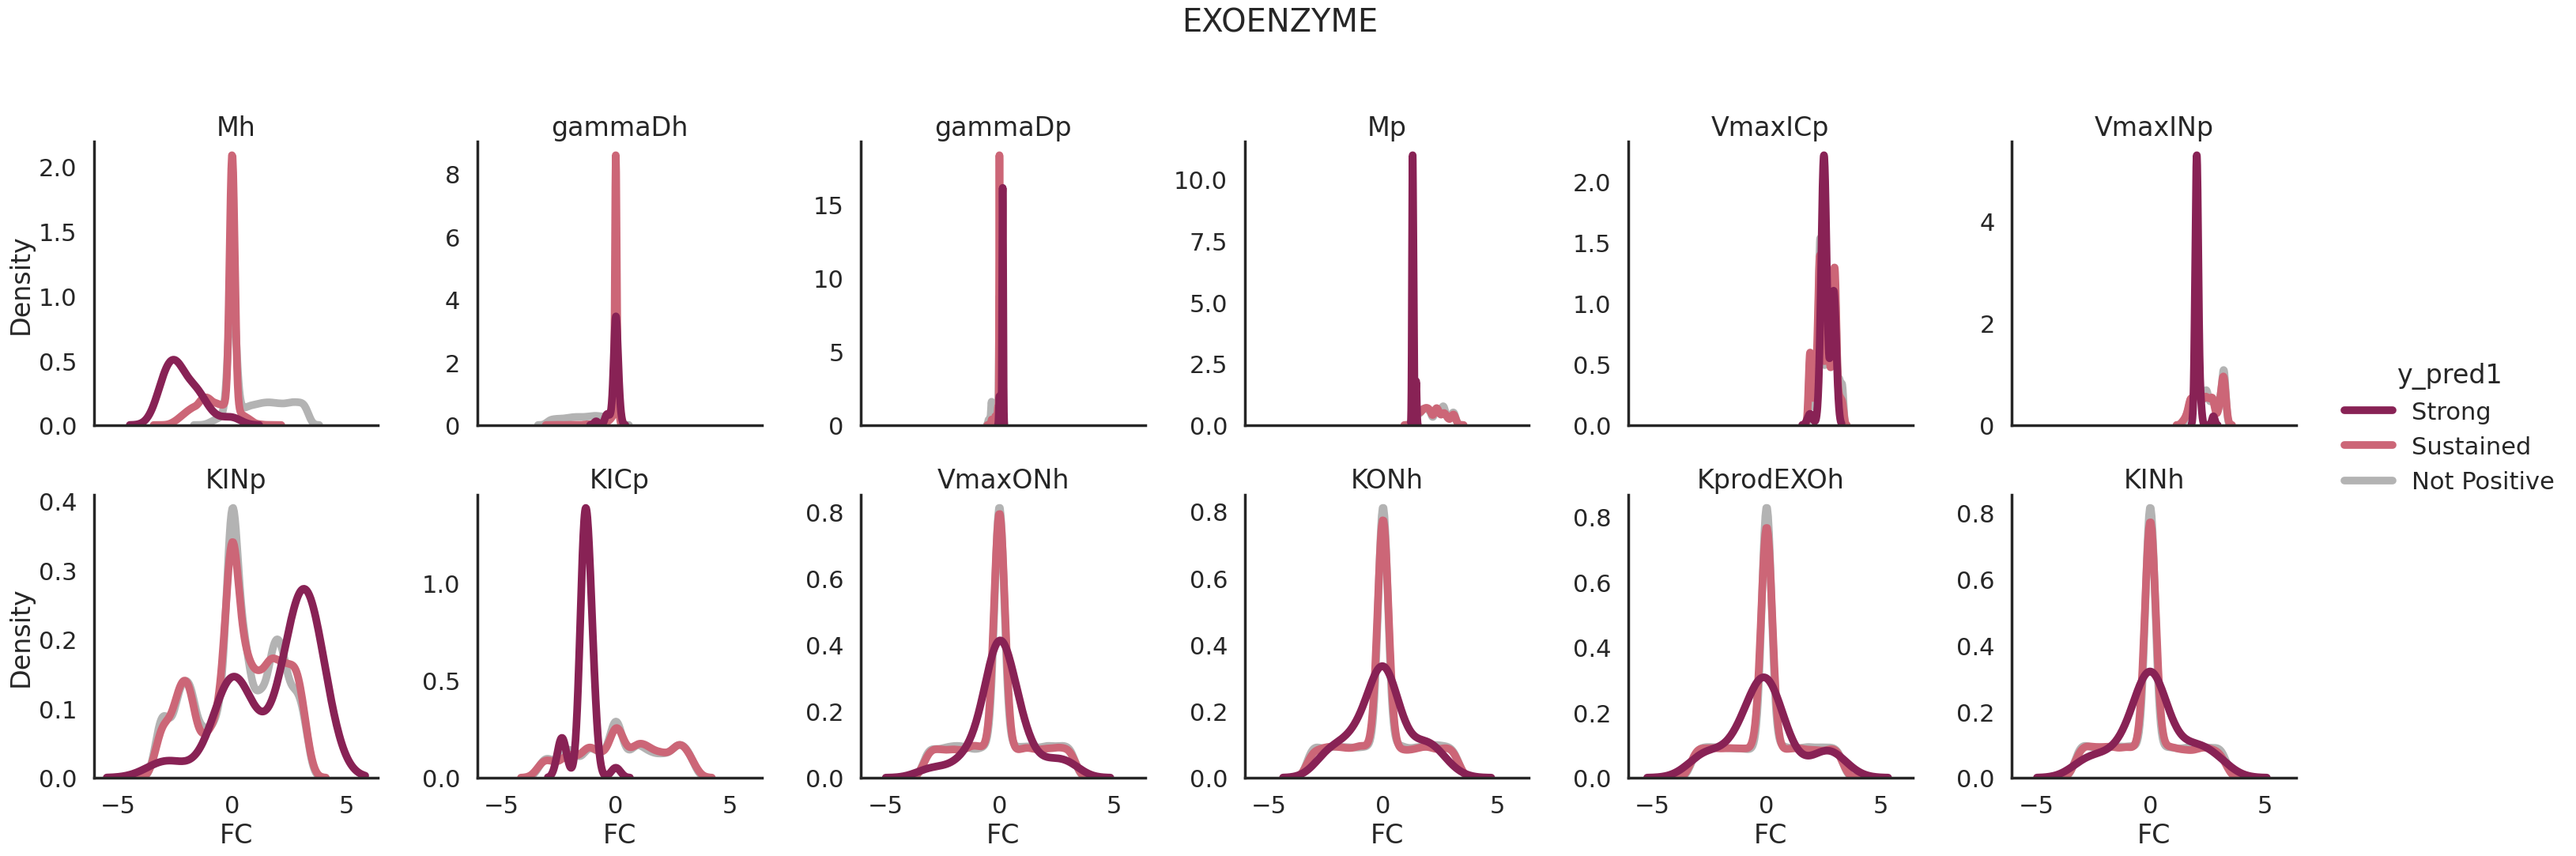

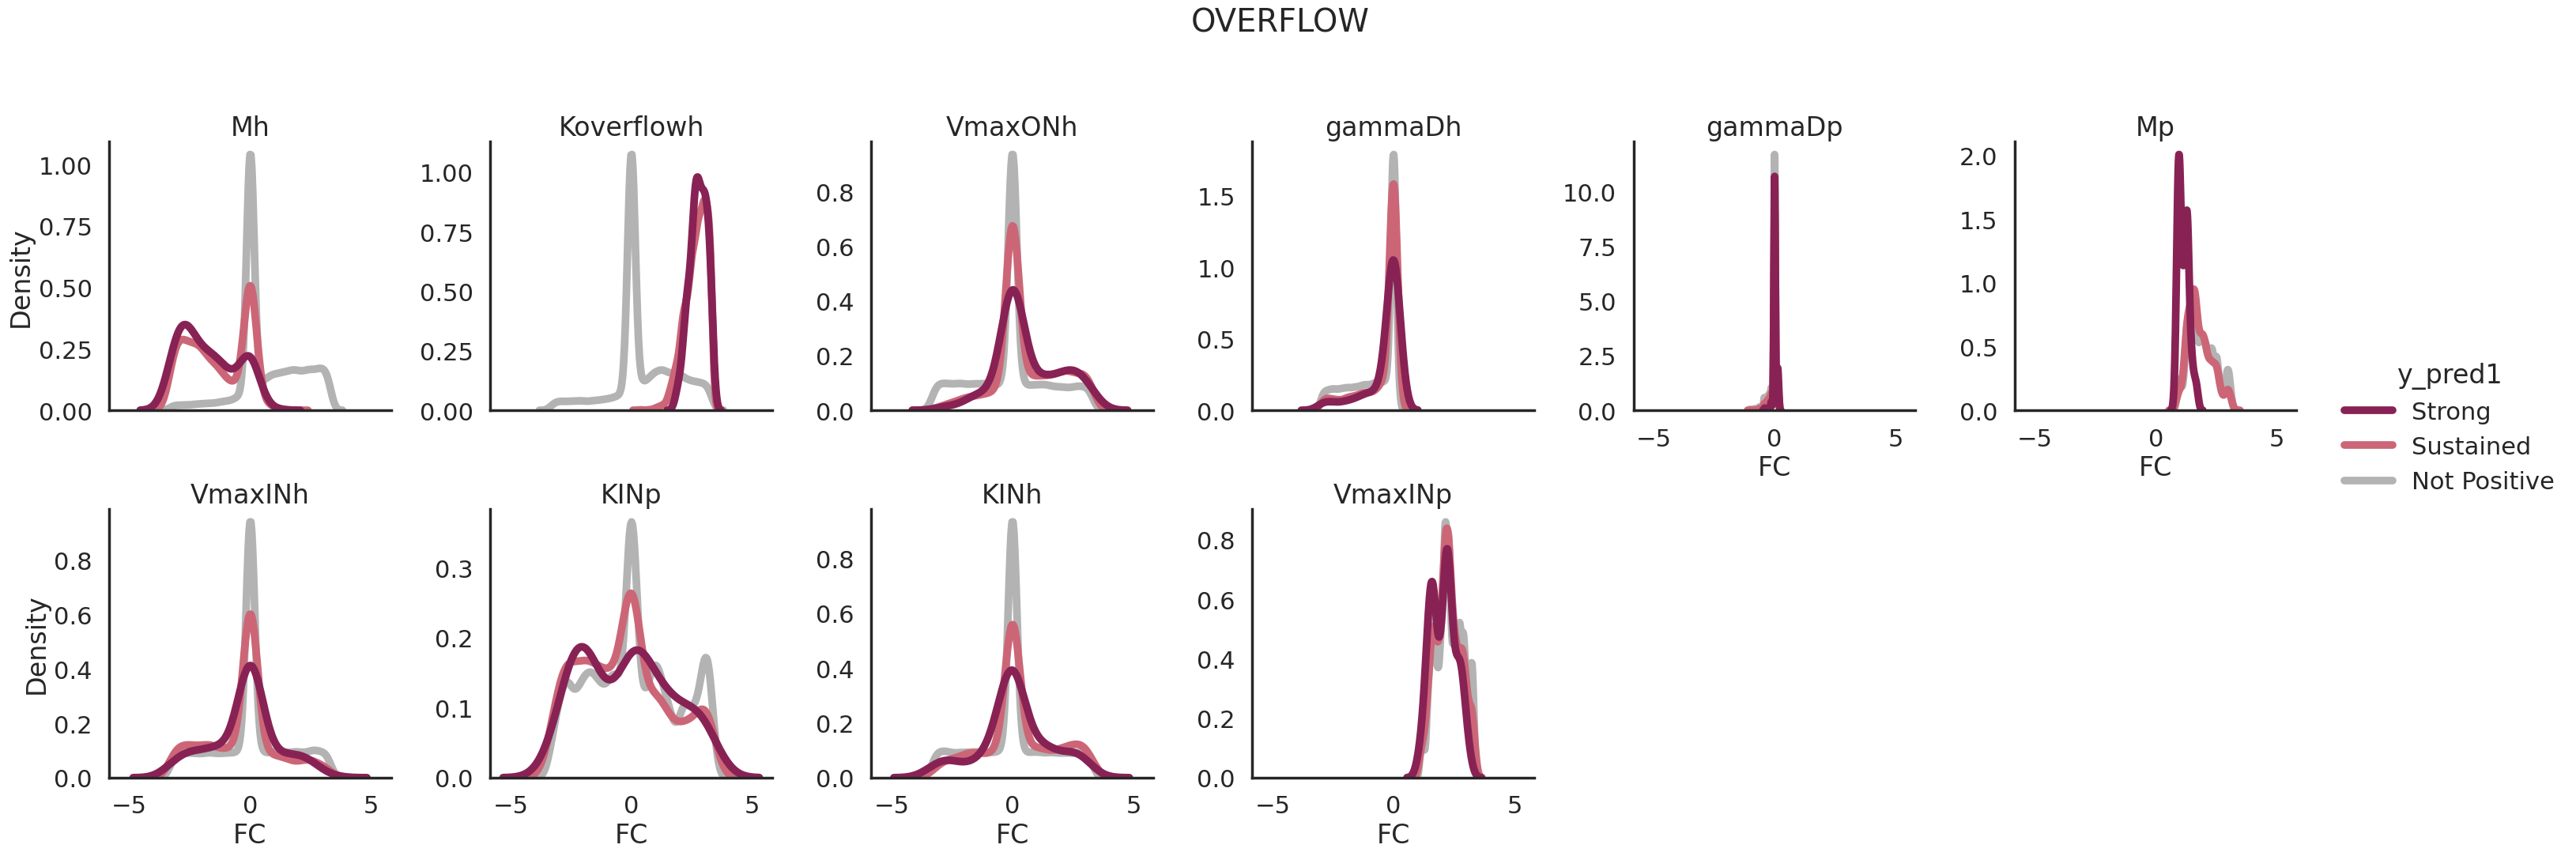

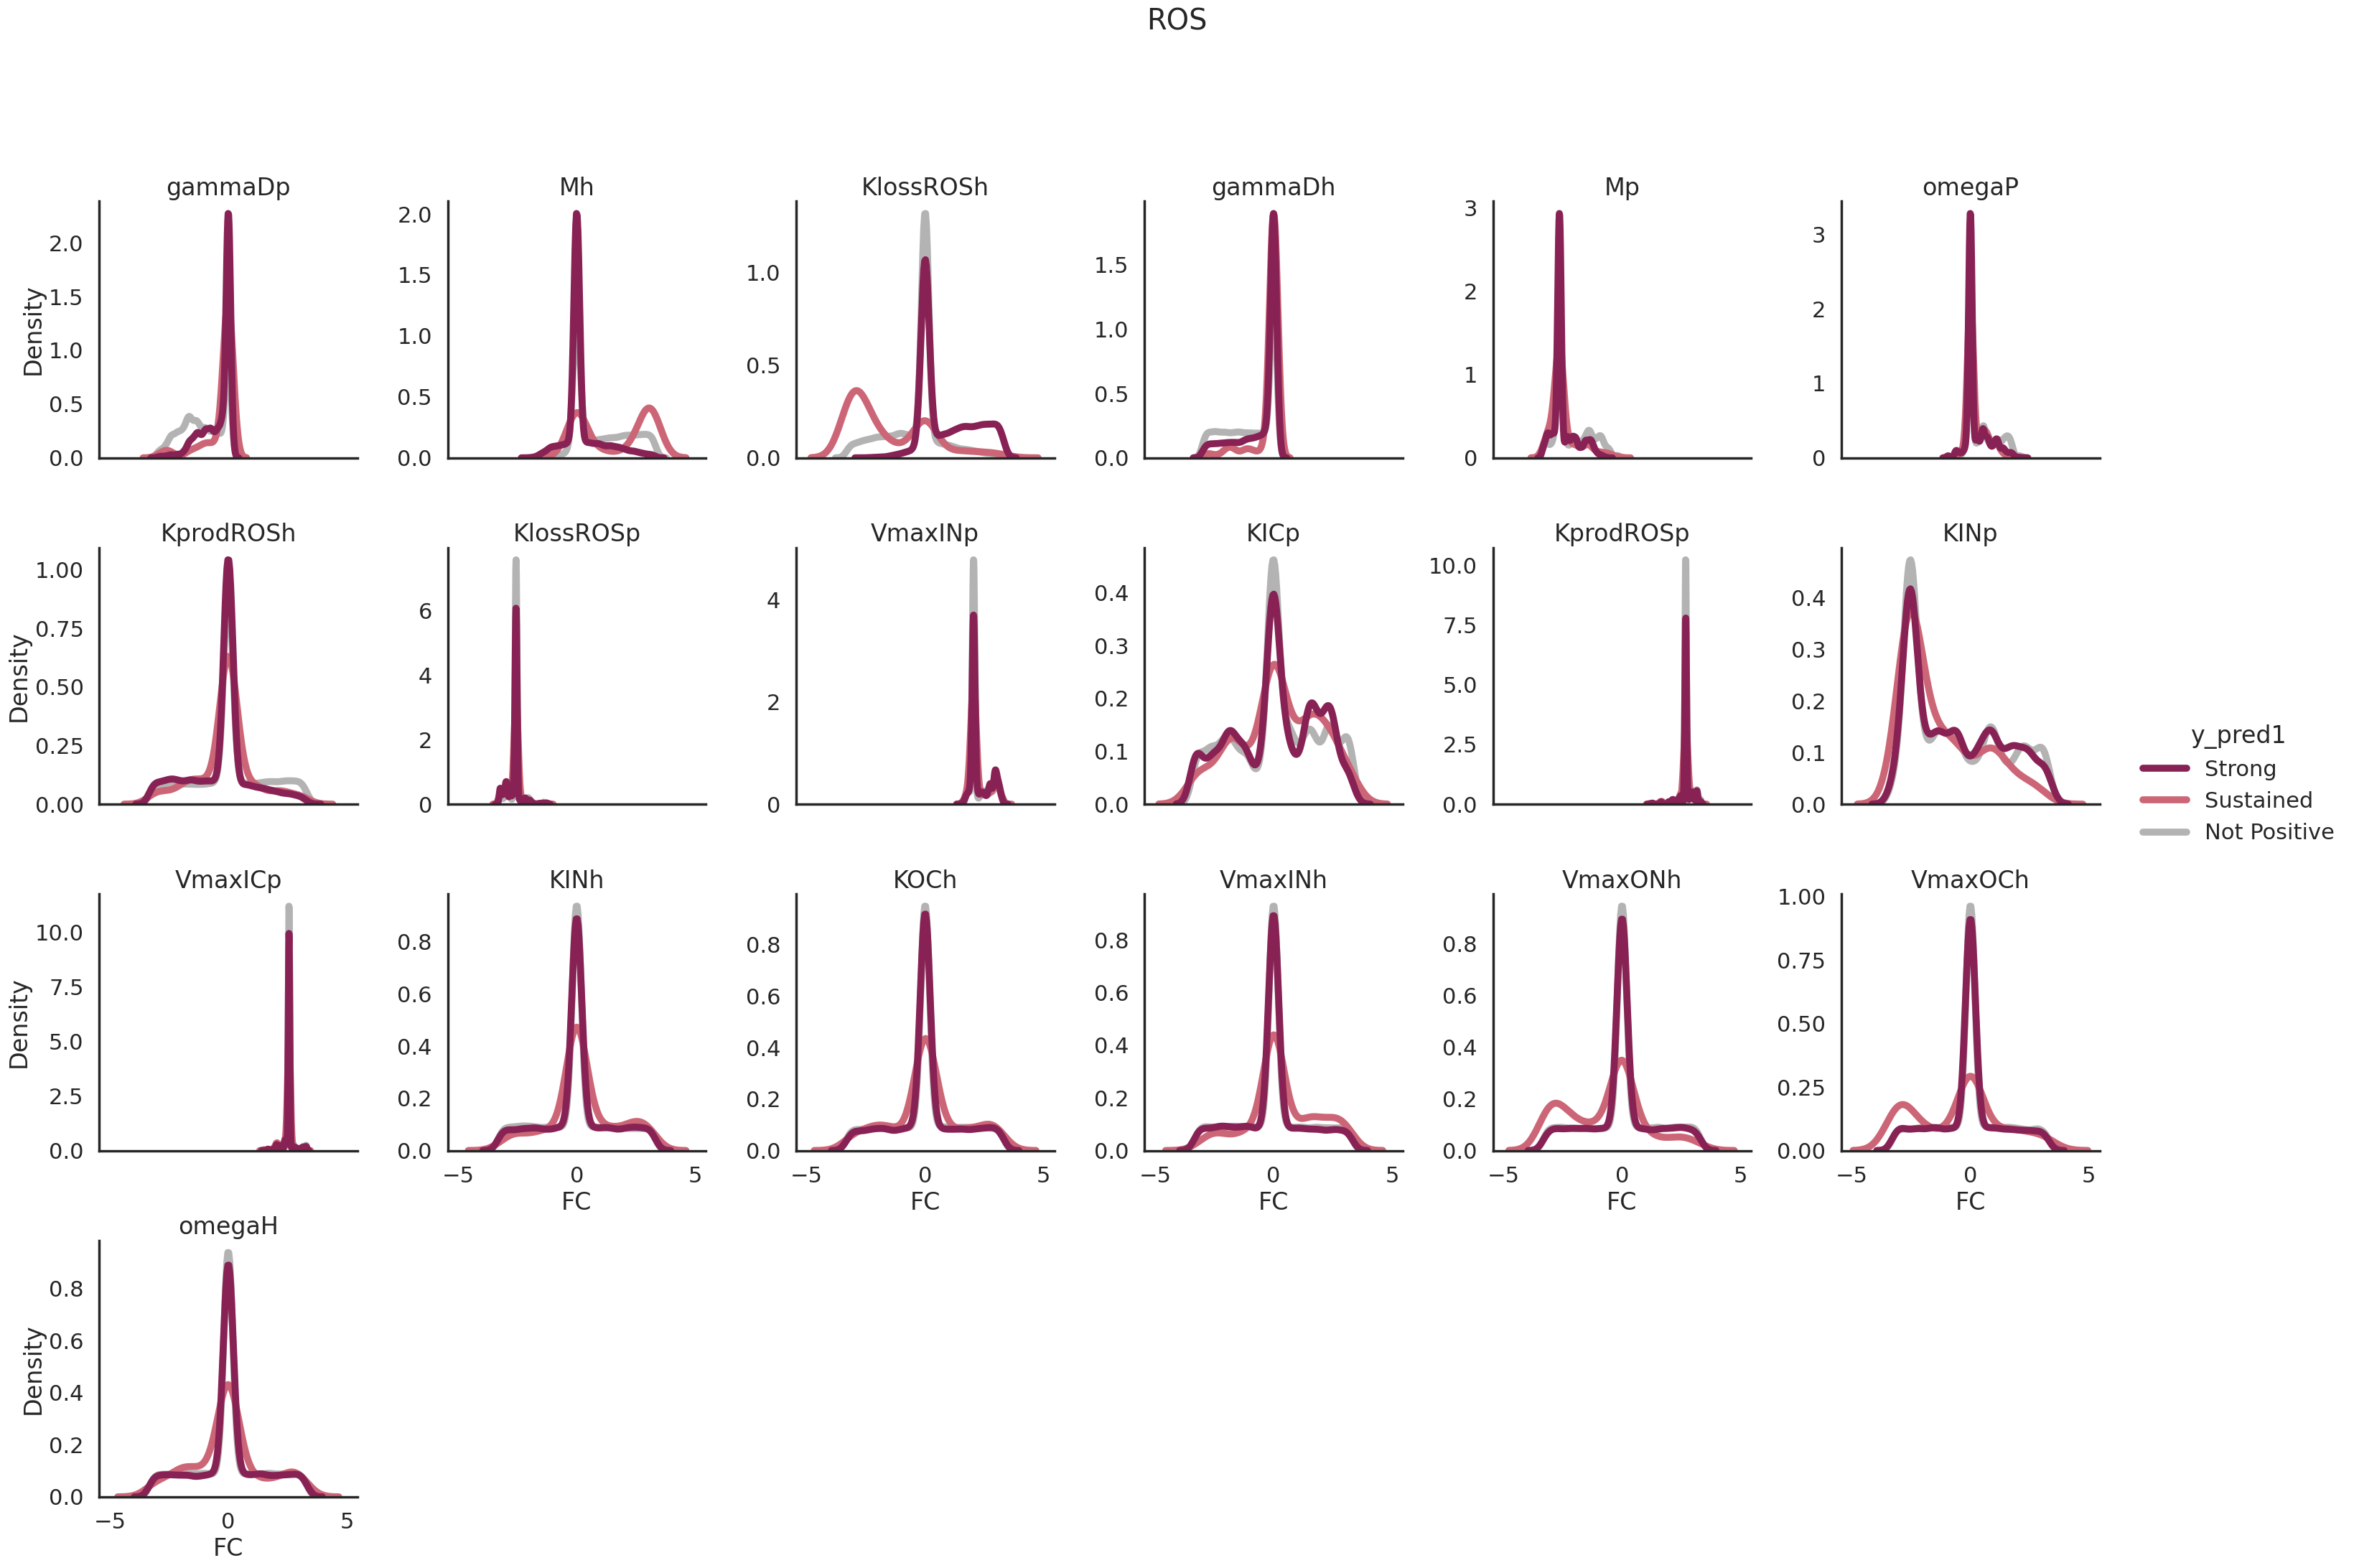

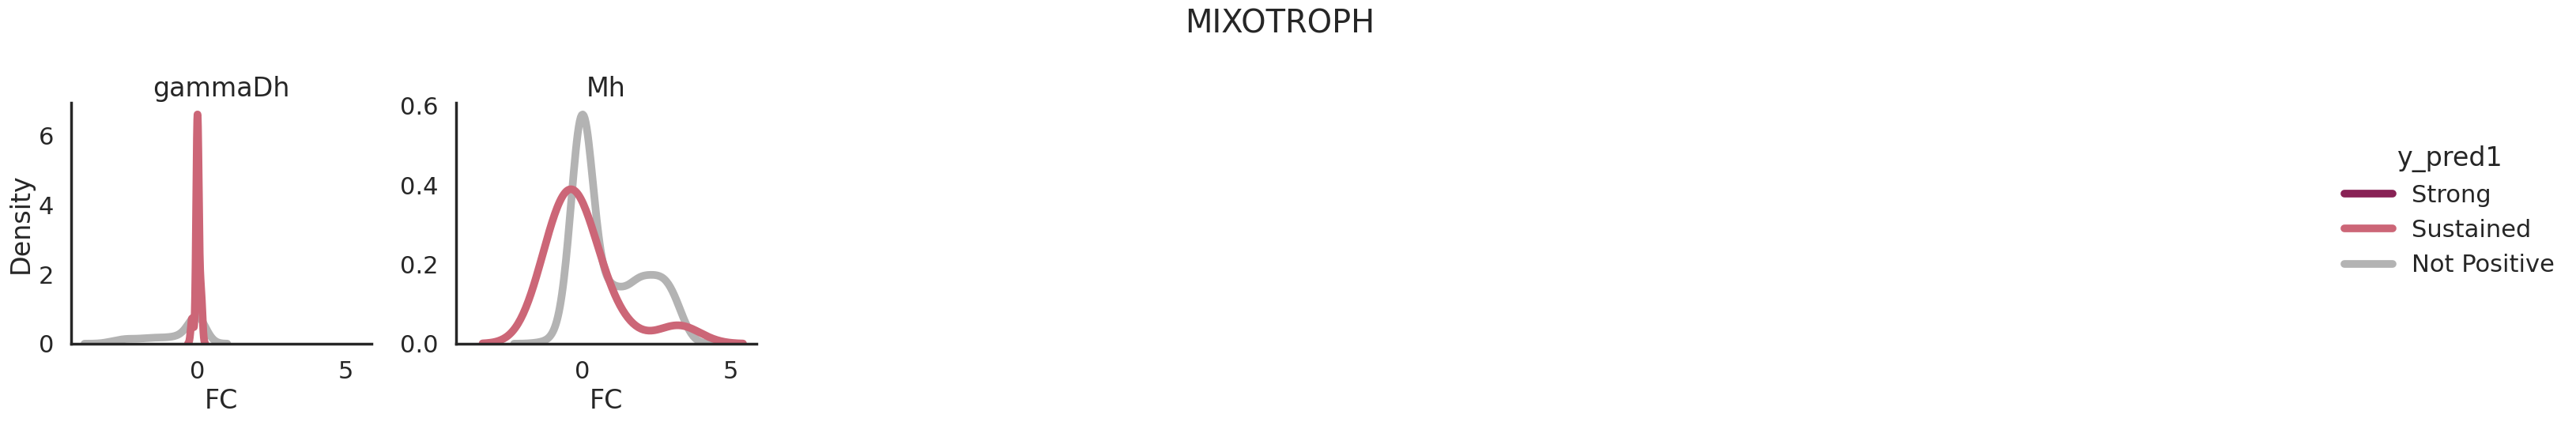

In [50]:
for m in morder:
    paramlist = ks_df.loc[
        ks_df.different_dist & 
        ks_df.subset.isin(['Strong,Sustained']) &
        ks_df.model.isin([m]), 'param']
    
    sns.displot(
        data=mparams_df.loc[mparams_df.param.isin(paramlist) & mparams_df.model.isin([m])],
        col='param', col_order=paramlist, col_wrap=6,
        x='FC', 
        hue='y_pred1', hue_order=gorder2, palette=gpalette2,
        kind='kde', common_norm=False, 
        facet_kws=dict(sharey=False), lw=7,
        
    ).set_titles(col_template='{col_name}')#.set(ylim=(0,2))
    plt.suptitle(m,y=1.1)

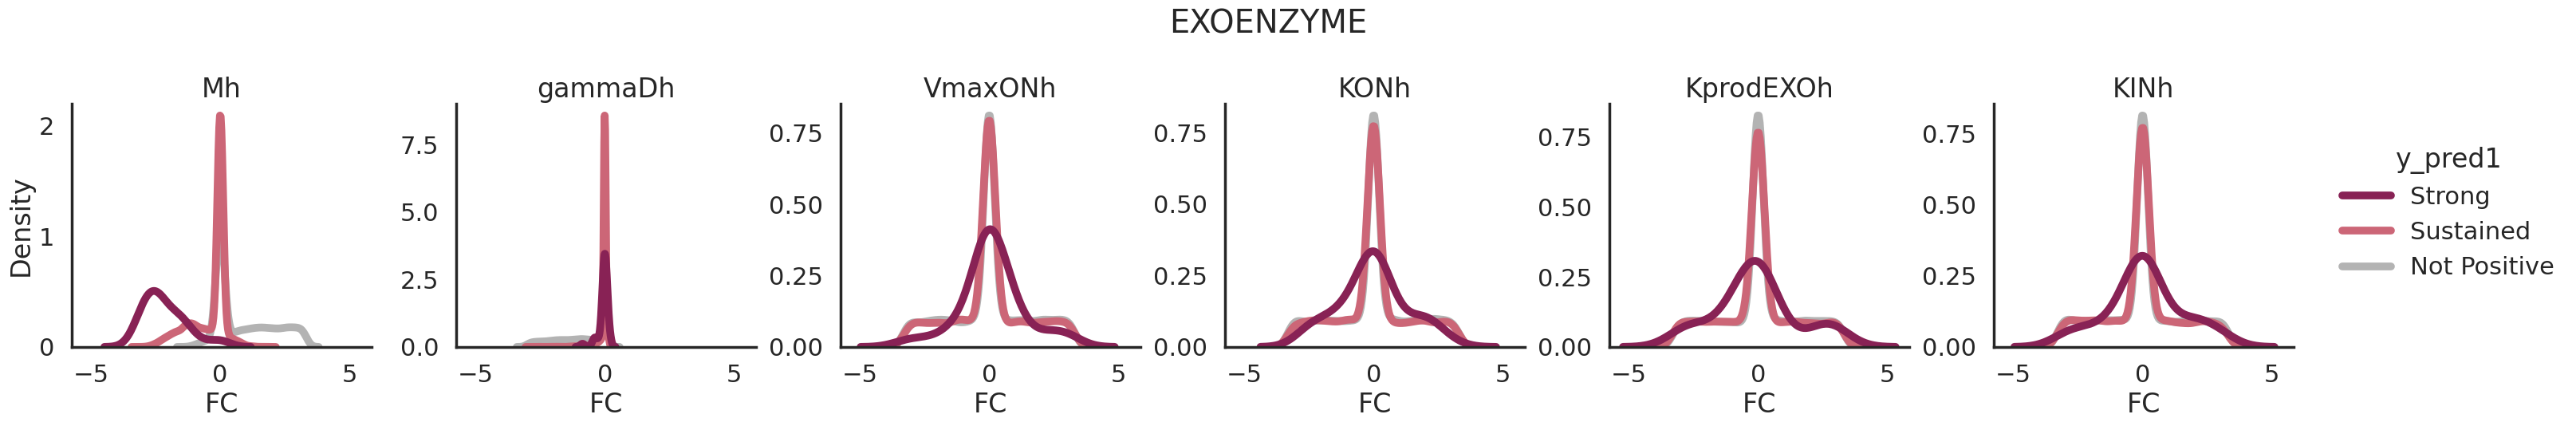

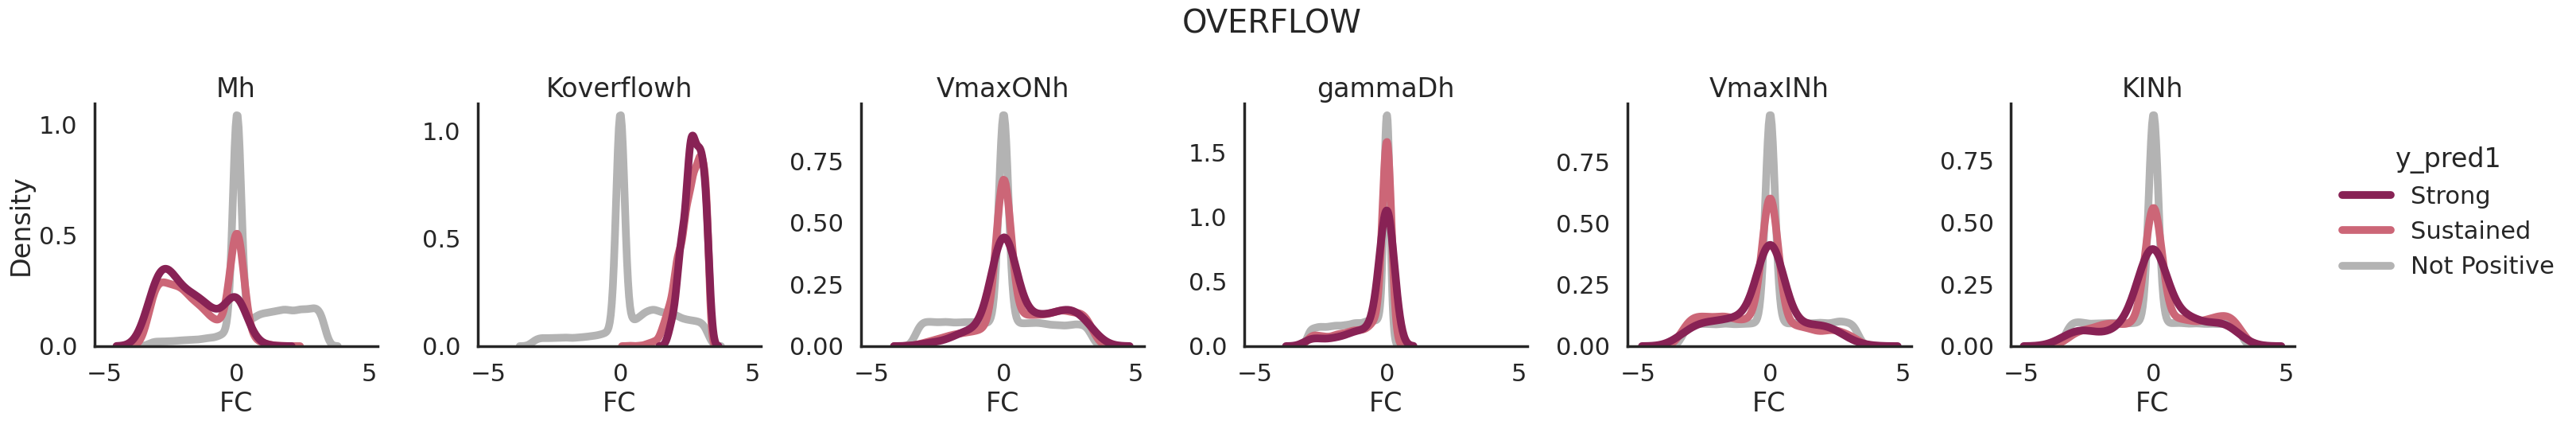

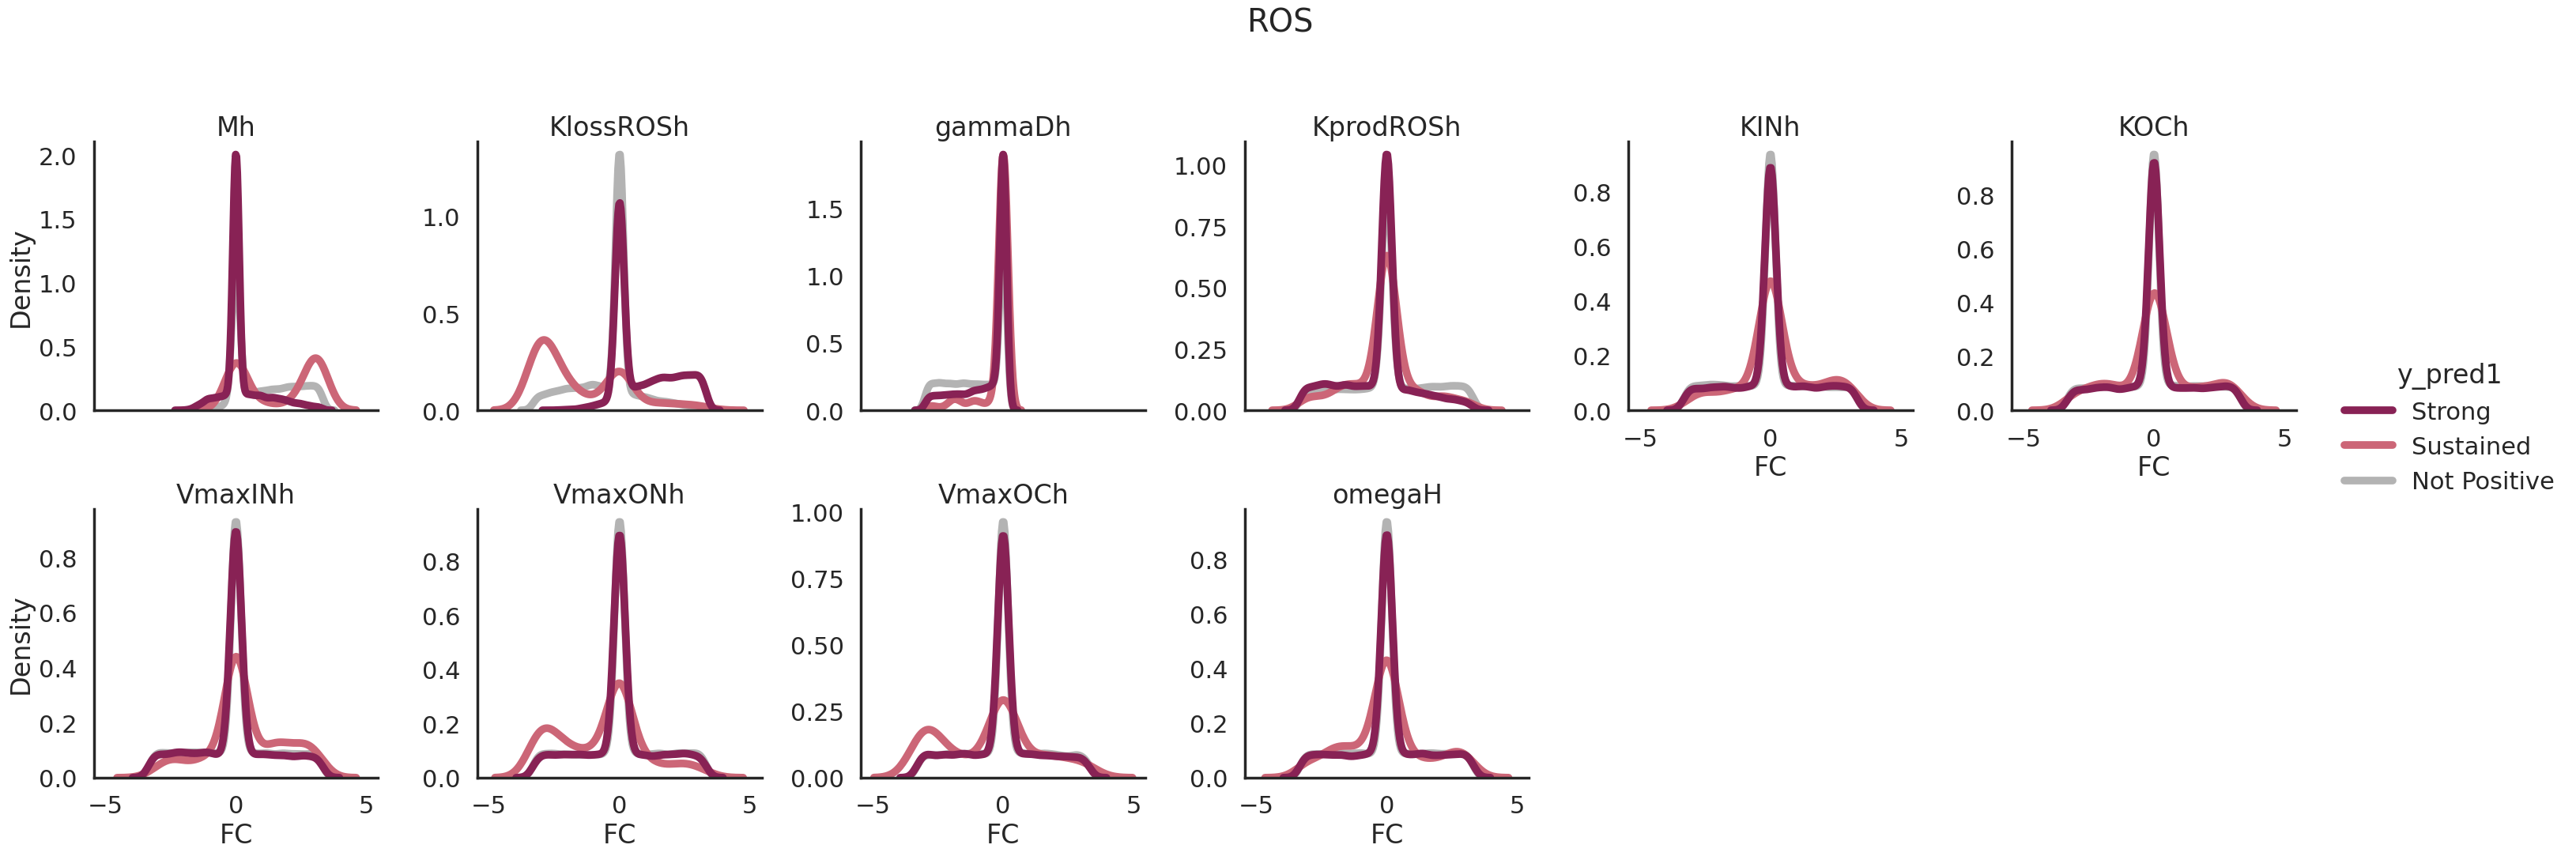

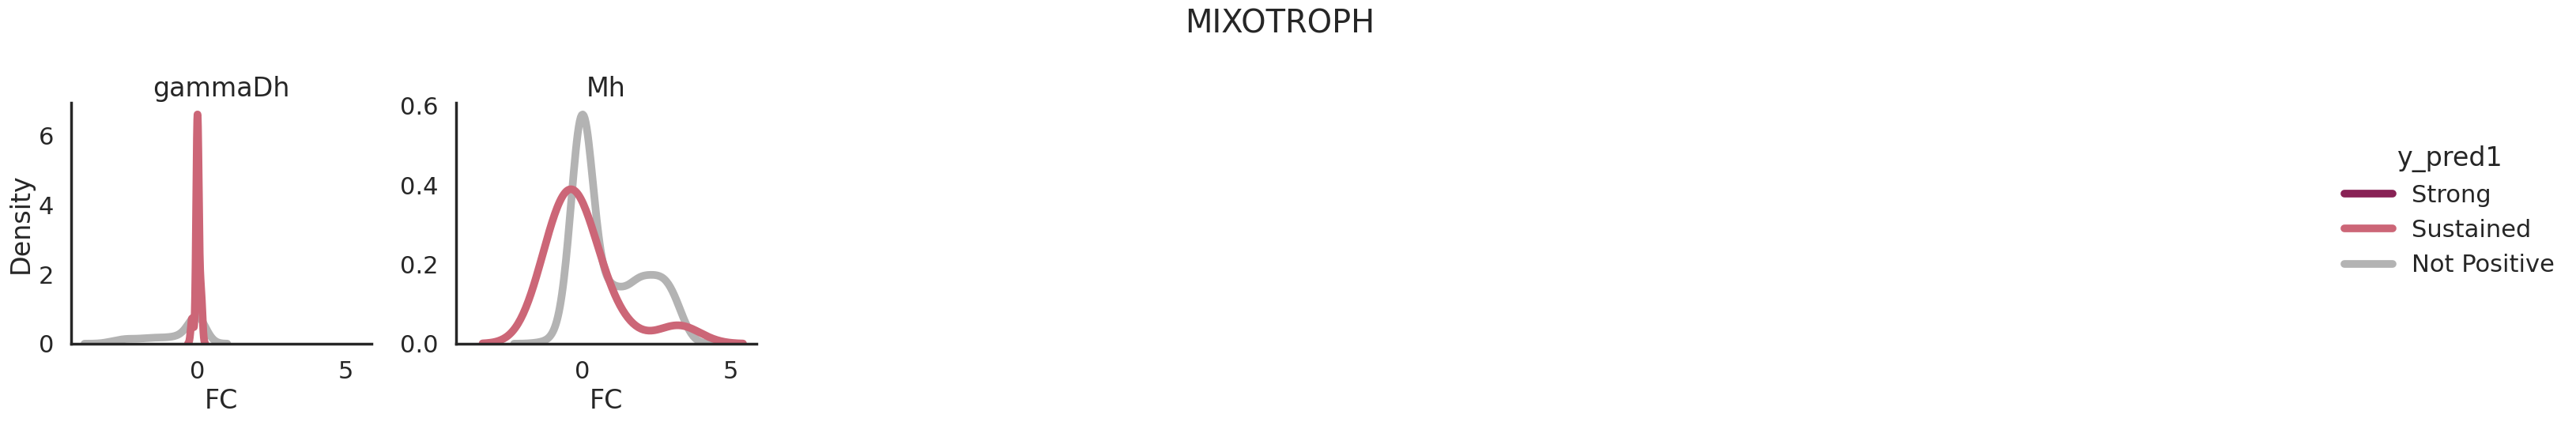

In [51]:
for m in morder:
    paramlist = ks_df.loc[
        ks_df.different_dist & 
        ks_df.subset.isin(['Strong,Sustained']) &
        ks_df.model.isin([m]) &
        ks_df.Strain.isin(['HET']), 
    'param']
    
    sns.displot(
        data=mparams_df.loc[mparams_df.param.isin(paramlist) & mparams_df.model.isin([m])],
        col='param', col_order=paramlist, col_wrap=6,
        x='FC', 
        hue='y_pred1', hue_order=gorder2, palette=gpalette2,
        kind='kde', common_norm=False, 
        facet_kws=dict(sharey=False), lw=7,
        
    ).set_titles(col_template='{col_name}')#.set(ylim=(0,2))
    plt.suptitle(m,y=1.1)

In [52]:
fmparams_df = mparams_df.pivot(
    index=id_vars + ['y_pred1'],
    columns='param', values='FC'
)

In [53]:
pmparams_df = mparams_df.pivot(
    index=id_vars + ['y_pred1'],
    columns='param', values='paramval'
)

In [54]:
pmparams_df = pmparams_df.reset_index()
fmparams_df = fmparams_df.reset_index()


In [55]:
mmparams_df = mparams_df.pivot(
    index=['run_id',  'y_pred', 'y_pred1', 'param1', 'paramtype', 
       'nutrient','model'],
    columns='Strain',
    values='paramval'
).reset_index()


In [56]:
fmmparams_df = mparams_df.pivot(
    index=['run_id',  'y_pred', 'y_pred1', 'param1', 'paramtype',
       'nutrient', 'model'],
    columns='Strain',
    values='FC'
).reset_index()


In [57]:
pmparams_df.y_pred1.value_counts()

y_pred1
Not Positive    83169
Strong          14082
Sustained       11722
Name: count, dtype: int64

In [58]:
pmparams_df['PRO recycle\n[Mp*gammaDp]'] = pmparams_df['Mp'] * pmparams_df['gammaDp']
pmparams_df['HET recycle\n[Mh*gammaDh]'] = pmparams_df['Mh'] * pmparams_df['gammaDh']


In [75]:
pmparams_df['PRO IN affinity\n[VmaxINp / KmINp]'] = pmparams_df['VmaxINp'] / pmparams_df['KINp']
pmparams_df['HET IN affinity\n[VmaxINh/ KmINh]'] = pmparams_df['VmaxINh'] / pmparams_df['KINh']
pmparams_df['HET ON affinity\n[VmaxONh/ KmONh]'] = pmparams_df['VmaxONh'] / pmparams_df['KONh']


In [59]:
pmparams_df.y_pred.unique()

array(['Sustained', 'Neutral', 'Other', 'Weak', 'Inhibited', 'Strong'],
      dtype=object)

In [60]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

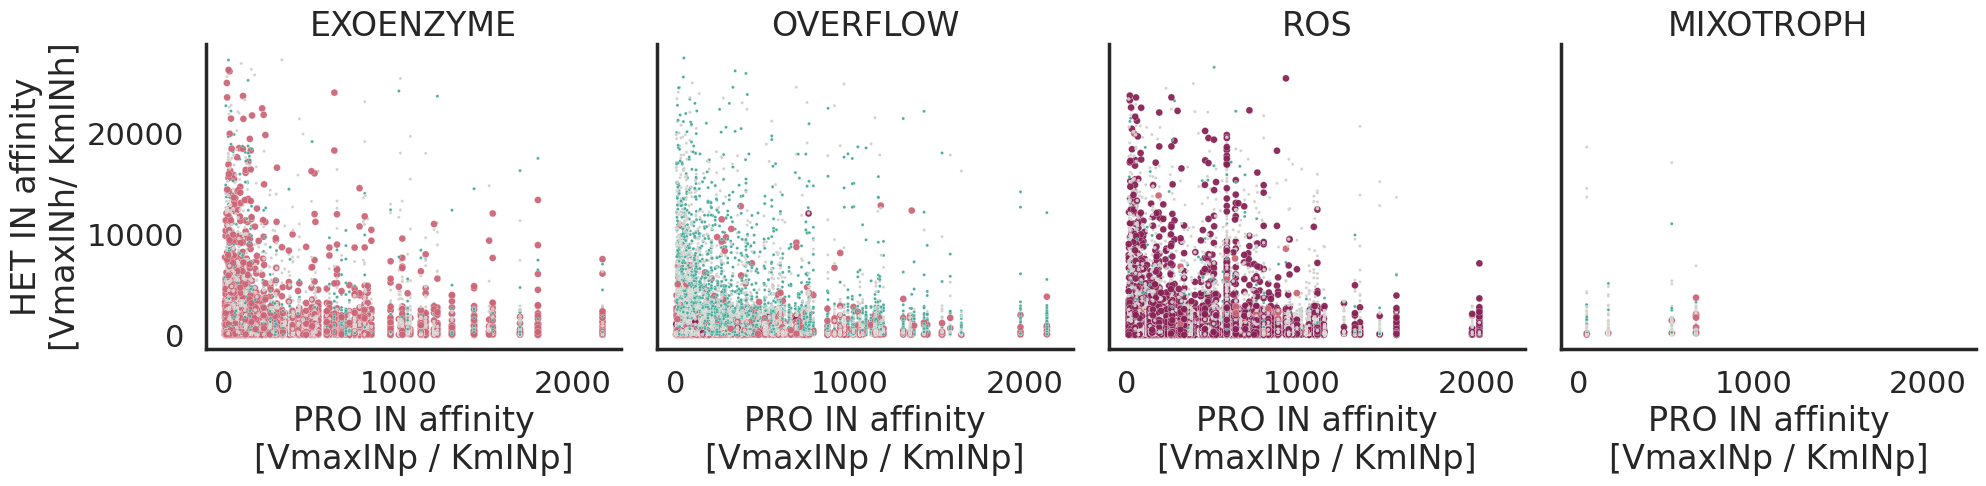

In [81]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('PRO IN affinity\n[VmaxINp / KmINp]', 'HET IN affinity\n[VmaxINh/ KmINh]')
sns.relplot(
    data=pmparams_df, 
    #common_norm=False,
    x=i, y=j,
    col='model', col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.95,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'

).set(
    #xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

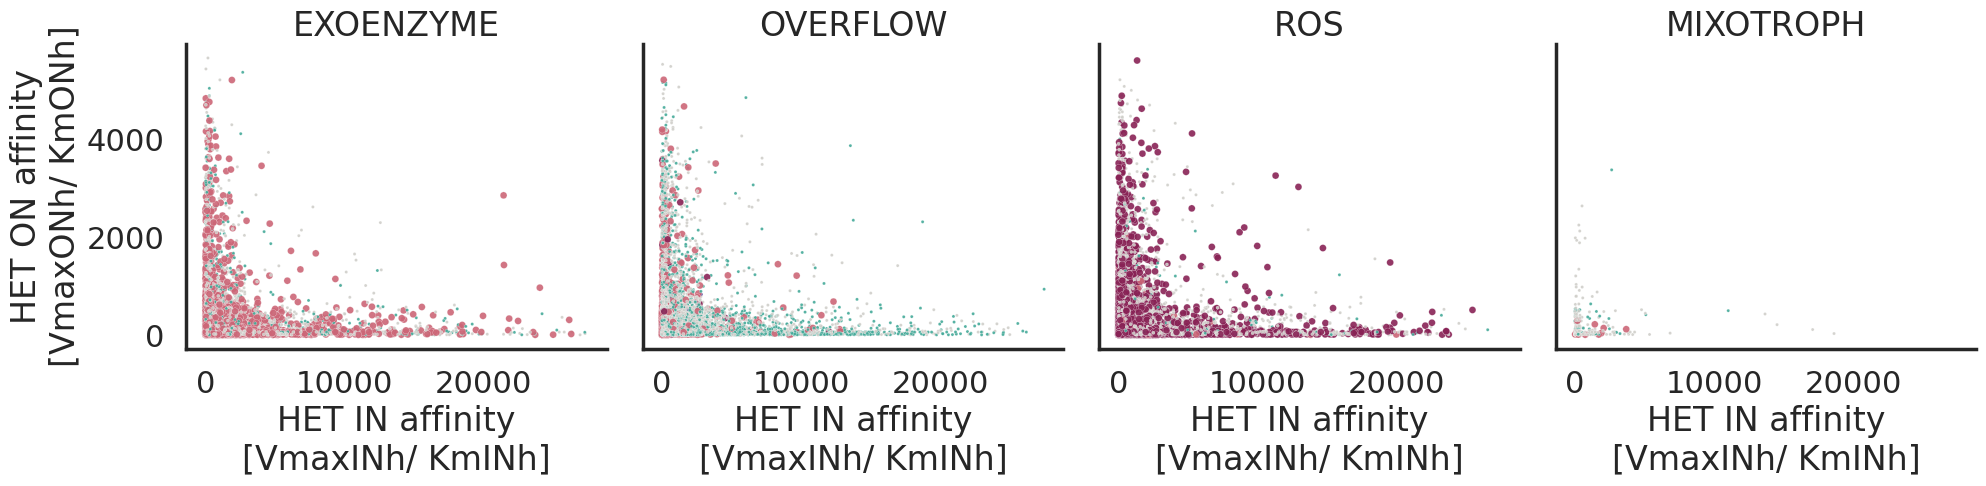

In [79]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('HET IN affinity\n[VmaxINh/ KmINh]', 'HET ON affinity\n[VmaxONh/ KmONh]')
sns.relplot(
    data=pmparams_df, 
    #common_norm=False,
    x=i, y=j,
    col='model', col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'

).set(
    #xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

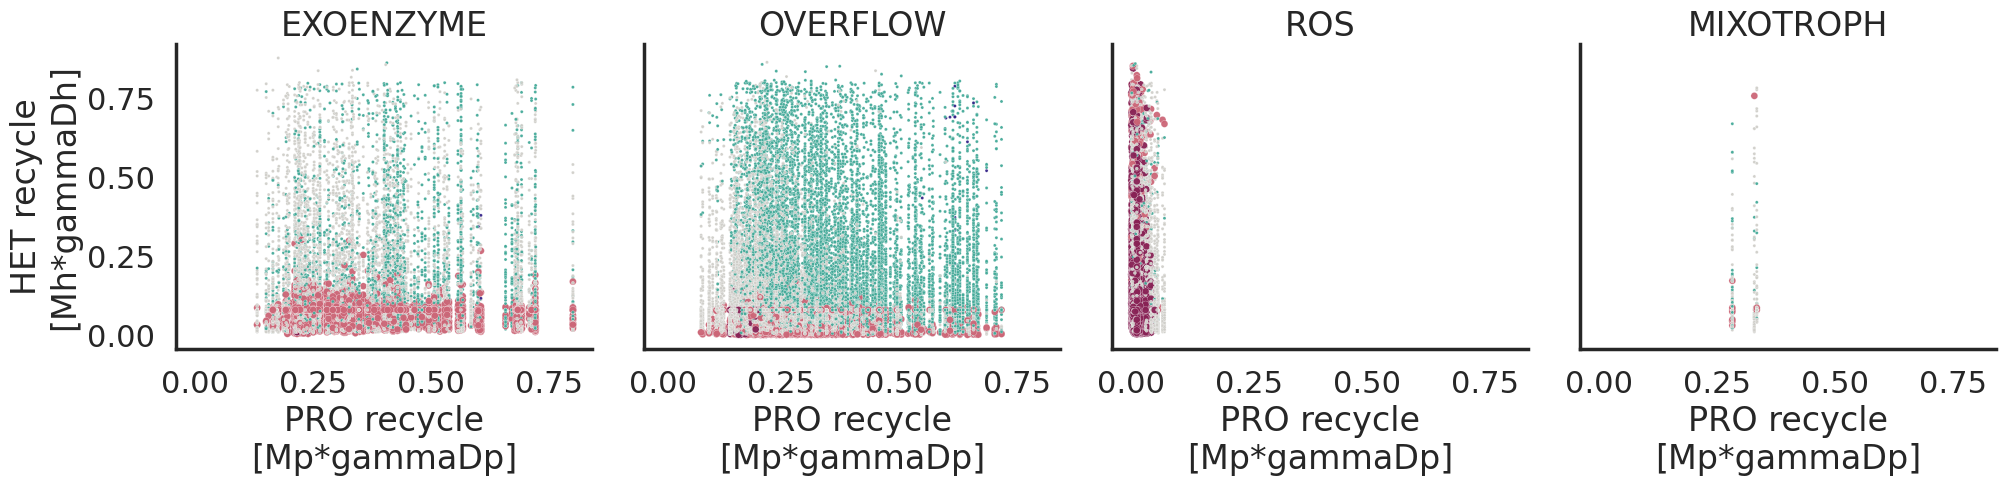

In [82]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('PRO recycle\n[Mp*gammaDp]', 'HET recycle\n[Mh*gammaDh]')
sns.relplot(
    data=pmparams_df, 
    #common_norm=False,
    x=i, y=j,
    col='model', col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.95,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'

).set(
    #xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

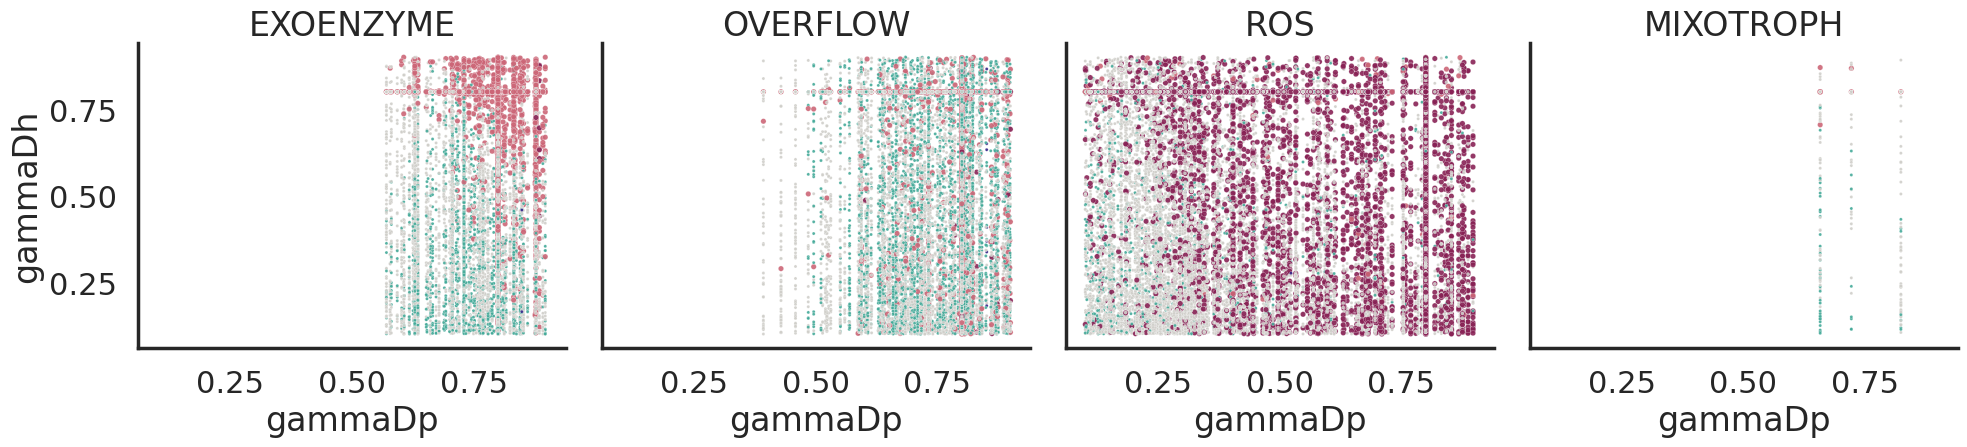

In [62]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('gammaDp', 'gammaDh')
sns.relplot(
    data=pmparams_df, 
    #common_norm=False,
    x=i, y=j,
    col='model', col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'
)
# ).set(
#     xscale='log', #yscale='log',
#     #xlabel=f'{i} [d-1]',
#     #ylabel=f'{j} [d-1]',
# )
#plt.suptitle('Versatile VPRO')

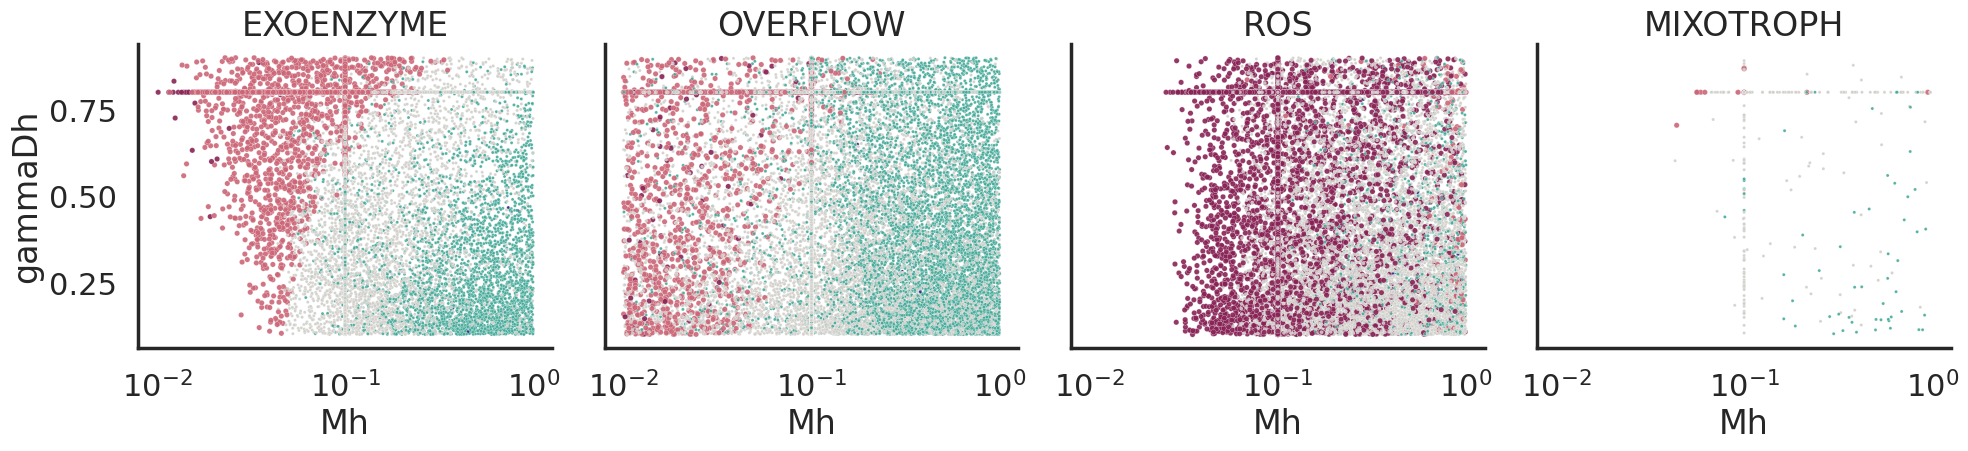

In [63]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('Mh', 'gammaDh')
sns.relplot(
    data=pmparams_df, 
    #common_norm=False,
    x=i, y=j,
    col='model', col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'
).set(
    xscale='log', #yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

In [64]:
pmparams_df.columns

Index(['run_id', 'y_pred', 'VPRO', 'model', 'Phase', 'Versatile', 'y_pred1',
       'KICp', 'KINh', 'KINp', 'KOCh', 'KOCp', 'KONh', 'KONp', 'KlossROSh',
       'KlossROSp', 'Koverflowh', 'Koverflowp', 'KprodEXOh', 'KprodROSh',
       'KprodROSp', 'Mh', 'Mp', 'VmaxICp', 'VmaxINh', 'VmaxINp', 'VmaxOCh',
       'VmaxOCp', 'VmaxONh', 'VmaxONp', 'gammaDh', 'gammaDp', 'omegaH',
       'omegaP', 'PRO recycle\n[Mp*gammaDp]', 'HET recycle\n[Mh*gammaDh]'],
      dtype='object', name='param')

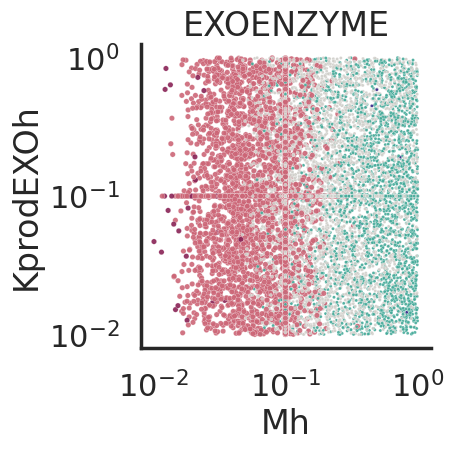

In [65]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('Mh', 'KprodEXOh')
sns.relplot(
    data=pmparams_df.loc[pmparams_df.model.isin(['EXOENZYME'])], 
    #common_norm=False,
    x=i, y=j,
    col='model', #col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'
).set(
    xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

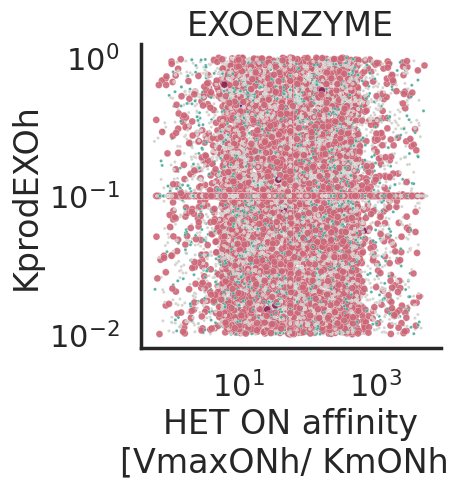

In [83]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('HET ON affinity\n[VmaxONh/ KmONh]', 'KprodEXOh')
sns.relplot(
    data=pmparams_df.loc[pmparams_df.model.isin(['EXOENZYME'])], 
    #common_norm=False,
    x=i, y=j,
    col='model', #col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'
).set(
    xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

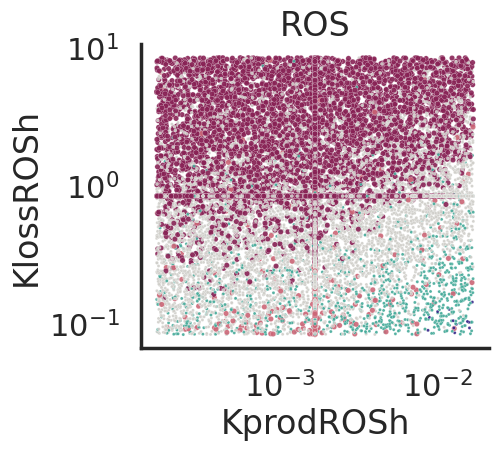

In [66]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('KprodROSh', 'KlossROSh')
sns.relplot(
    data=pmparams_df.loc[pmparams_df.model.isin(['ROS'])], 
    #common_norm=False,
    x=i, y=j,
    col='model', #col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'
).set(
    xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

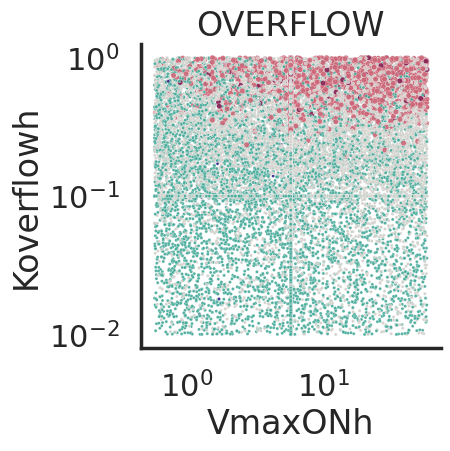

In [67]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('VmaxONh','Koverflowh', )
sns.relplot(
    data=pmparams_df.loc[pmparams_df.model.isin(['OVERFLOW'])], 
    #common_norm=False,
    x=i, y=j,
    col='model', #col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'
).set(
    xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

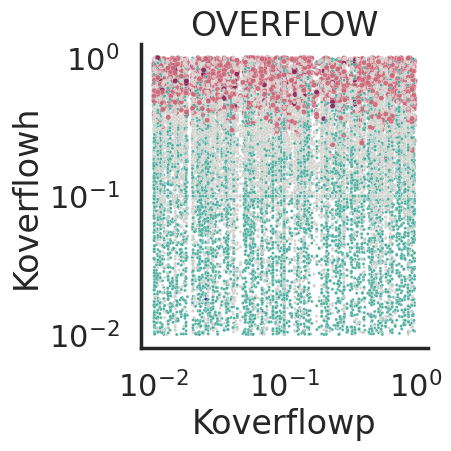

In [68]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('Koverflowp','Koverflowh', )
sns.relplot(
    data=pmparams_df.loc[pmparams_df.model.isin(['OVERFLOW'])], 
    #common_norm=False,
    x=i, y=j,
    col='model', #col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'
).set(
    xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

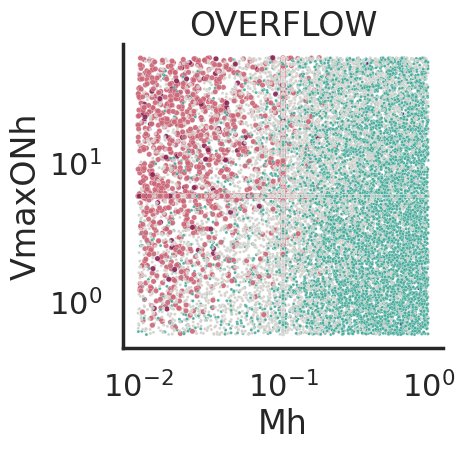

In [69]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('Mh', 'VmaxONh')
sns.relplot(
    data=pmparams_df.loc[pmparams_df.model.isin(['OVERFLOW'])], 
    #common_norm=False,
    x=i, y=j,
    col='model', #col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'
).set(
    xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

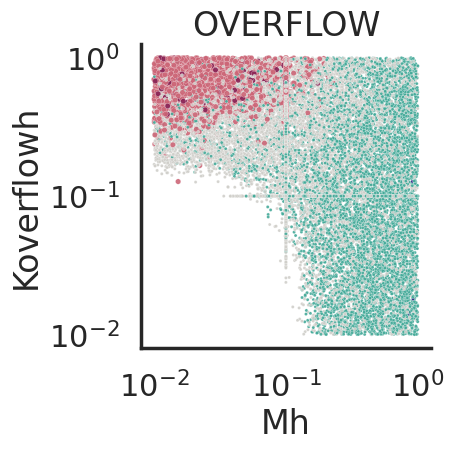

In [70]:
sns.set_context('poster')
 
#for i,j in [('VmaxICp', 'VmaxINp'), ('Mp', 'gammaDp')]:
i,j = ('Mh', 'Koverflowh', )
sns.relplot(
    data=pmparams_df.loc[pmparams_df.model.isin(['OVERFLOW'])], 
    #common_norm=False,
    x=i, y=j,
    col='model', #col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.9,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpaletteon),
    facet_kws=dict(margin_titles=True),
    legend=False,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'
).set(
    xscale='log', yscale='log',
    #xlabel=f'{i} [d-1]',
    #ylabel=f'{j} [d-1]',
)
#plt.suptitle('Versatile VPRO')

In [71]:
stop

NameError: name 'stop' is not defined

In [ ]:
g = sns.catplot(
    data=mparams_df.loc[mparams_df.paramtype.isna()],
    y='y_pred', x='paramval', kind='box',
    sharex=False, 
    hue='y_pred', hue_order=gorder, palette=gpalette, order=gorder,
    
    col='param1', #col_order=het_params_to_update, 
    #col_wrap=6, 
    dodge=False,
    row='Strain'
)
g.set_titles(col_template='{col_name}', row_template ='{row_name}')


In [ ]:
g = sns.catplot(
    data=mparams_df.loc[~mparams_df.paramtype.isna()],
    y='y_pred', x='paramval', kind='box',
    sharex=False, 
    hue='y_pred', hue_order=gorder, palette=gpalette, order=gorder,
    
    col='param1', #col_order=het_params_to_update, 
    #col_wrap=6, 
    dodge=False,
    row='Strain'
)
g.set_titles(col_template='{col_name}', row_template ='{row_name}')


In [ ]:
g = sns.displot(
    data=mmparams_df.loc[ mmparams_df.y_pred.isin(['Strong'])].dropna(subset=['PRO', 'HET']),
    y='HET', x='PRO', #kind='box',
    facet_kws=dict(sharex=False, sharey=False), 
    #hue='y_pred', hue_order=gorder, palette=gpalette, order=gorder,
    color=gpalette[0],
    col='param1', #col_order=het_params_to_update, 
    #col_wrap=6, 
    #dodge=False,
    #row='Strain'
    #log_scale =True,
    kind='kde',common_norm=False
)
g.set_titles(col_template='{col_name}', row_template ='{row_name}')


In [ ]:
g = sns.displot(
    data=fmparams_df.loc[ mmparams_df.y_pred.isin(['Strong'])].dropna(subset=['PRO', 'HET']),
    y='HET', x='PRO', #kind='box',
    facet_kws=dict(sharex=False, sharey=False), 
    #hue='y_pred', hue_order=gorder, palette=gpalette, order=gorder,
    color=gpalette[0],
    col='param1', #col_order=het_params_to_update, 
    #col_wrap=6, 
    #dodge=False,
    #row='Strain'
    #log_scale =True,
    kind='kde',common_norm=False
)
g.set_titles(col_template='{col_name}', row_template ='{row_name}')


In [ ]:

mmparams_df.dropna(subset=['PRO', 'HET']).param1.unique()
gorder1 = gorder[:5]
gpalette1 = gpalette[:5] 
sns.color_palette(gpalette1)

In [ ]:
for v in ['KIN', 'Koverflow', 'M', 'VmaxIN', 'gammaD', ]:
    
    g = sns.displot(
        data=mmparams_df.loc[mmparams_df.param1.isin([v]) & mmparams_df.y_pred.isin(gorder1)] .dropna(subset=['PRO', 'HET']),
        y='HET', x='PRO', #kind='box',
        #facet_kws=dict(sharex=False, sharey=False), 
        hue='y_pred', hue_order=gorder1, palette=gpalette1, #order=gorder,
        #color=gpalette[0],
        #col='param1', #col_order=het_params_to_update, 
        #col_wrap=6, 
        #dodge=False,
        col='y_pred', col_order=gorder1,
        #log_scale =True,
        kind='kde',common_norm=False
    )
    g.set_titles(col_template='{col_name}', row_template ='{row_name}')
    plt.suptitle(v)
    plt.show()


In [ ]:
significant_params

In [ ]:
for v in ['KIN', 'Koverflow',  'M', 'VmaxIN', 'gammaD', ]:
    
    g = sns.displot(
        data=fmparams_df.loc[mmparams_df.param1.isin([v]) & mmparams_df.y_pred.isin(gorder1)] .dropna(subset=['PRO', 'HET']),
        y='HET', x='PRO', #kind='box',
        #facet_kws=dict(sharex=False, sharey=False), 
        hue='y_pred', hue_order=gorder1, palette=gpalette1, #order=gorder,
        #color=gpalette[0],
        #col='param1', #col_order=het_params_to_update, 
        #col_wrap=6, 
        #dodge=False,
        col='y_pred', col_order=gorder1,
        #log_scale =True,
        kind='kde',common_norm=False
    )
    g.set_titles(col_template='{col_name}', row_template ='{row_name}')
    plt.suptitle(v)
    plt.show()


In [ ]:
for v in ['KOC', 'KON', 'VmaxOC', 'VmaxON']:
    
    g = sns.displot(
        data=fmparams_df.loc[fmparams_df.param1.isin([v]) & fmparams_df.y_pred.isin(gorder1)],
        x='HET', #x='PRO', #kind='box',
        #facet_kws=dict(sharex=False, sharey=False), 
        hue='y_pred', hue_order=gorder1, palette=gpalette1, #order=gorder,
        #color=gpalette[0],
        #col='param1', #col_order=het_params_to_update, 
        #col_wrap=6, 
        #dodge=False,
        #col='y_pred', col_order=gorder1,
        #log_scale =True,
        kind='kde',common_norm=False
    )
    g.set_titles(col_template='{col_name}', row_template ='{row_name}')
    plt.suptitle(v)
    plt.show()


In [ ]:
vars_to_explore5 =  ['KIN', 'Koverflow',  'M', 'VmaxIN', 'gammaD', ]
    
g = sns.displot(
    data=mmparams_df.loc[mmparams_df.param1.isin(vars_to_explore5) & 
                         mmparams_df.y_pred.isin(gorder1)] .dropna(subset=['PRO', 'HET']),
    y='HET', x='PRO', #kind='box',
    facet_kws=dict(sharex=False, sharey=False), 
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1), #order=gorder,
    #color=gpalette[0],
    col='param1', col_order=vars_to_explore5, 
    #col_wrap=6, 
    #dodge=False,
    #col='y_pred', col_order=gorder1,
    #log_scale =True,
    kind='kde',common_norm=False
)
g.set_titles(col_template='{col_name}', row_template ='{row_name}')
#plt.suptitle(v)
plt.show()


In [ ]:
vars_to_explore5 =  ['KIN', 'Koverflow',  'M', 'VmaxIN', 'gammaD', ]
    
g = sns.displot(
    data=fmparams_df.loc[mmparams_df.param1.isin(vars_to_explore5) & 
                         mmparams_df.y_pred.isin(gorder1)] .dropna(subset=['PRO', 'HET']),
    y='HET', x='PRO', #kind='box',
    facet_kws=dict(sharex=False, sharey=False), 
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1), #order=gorder,
    #color=gpalette[0],
    col='param1', col_order=vars_to_explore5, 
    #col_wrap=6, 
    #dodge=False,
    #col='y_pred', col_order=gorder1,
    #log_scale =True,
    kind='kde',common_norm=False
)
g.set_titles(col_template='{col_name}', row_template ='{row_name}')
#plt.suptitle(v)
plt.show()


In [ ]:
g = sns.relplot(
    data=mmparams_df.loc[~mmparams_df.paramtype.isna() & mmparams_df.y_pred.isin(['Strong'])],
    y='HET', x='PRO', #kind='box',
    facet_kws=dict(sharex=False, sharey=False), 
    #hue='y_pred', hue_order=gorder, palette=gpalette, order=gorder,
    
    col='param1', #col_order=het_params_to_update, 
    #col_wrap=6, 
    #dodge=False,
    #row='Strain'
)
g.set_titles(col_template='{col_name}', row_template ='{row_name}')


In [ ]:
g = sns.catplot(
    data=mparams_df.loc[~mparams_df.paramtype.isna()],
    y='y_pred', x='paramval', kind='box',
    sharex=False, 
    hue='y_pred', hue_order=gorder, palette=gpalette, order=gorder,
    
    col='param1', #col_order=het_params_to_update, 
    #col_wrap=6, 
    dodge=False,
    row='Strain'
)
g.set_titles(col_template='{col_name}', row_template ='{row_name}')


In [ ]:
fmparams_df.loc[fmparams_df.PRO.isna()].param1.unique()

In [ ]:
from matplotlib.colors import LogNorm, Normalize
cols_for_heatmap = [
    'Mh', #'Mp', 
    'gammaDh', 'gammaDp', 
    'KINh', 'KINp', 'KOCh', 'KONh',
    #'VmaxICp', 
    'VmaxINh', #'VmaxINp',
    'VmaxOCh', 'VmaxONh', 
    #'KlossROSh', 'KlossROSp',   'KprodROSh', 'KprodROSp', 
    'omegaH', 'omegaP'
]
pmparams_df = mparams_df.loc[mparams_df.y_pred.isin(['Strong'])].pivot(
    index=['run_id'],  
    #columns=['param1', 'paramtype',   'nutrient', 'Strain',],
    columns=['param'],
    values='FC'
)
sns.set_context('talk')
sns.clustermap(
    data=pmparams_df[significant_params],
    yticklabels=[],
    standard_scale=1,
    cmap='viridis',robust=True,
    #col_cluster=False,
    #norm=LogNorm()
)

In [ ]:
significant_params_ros = [
#     'KICp',
#  'KINp',
 'KlossROSh',
 'KlossROSp',
 'KprodROSh',
 'KprodROSp',
#  'Mh',
#  'Mp',
#  'VmaxICp',
#  'VmaxINp',
#  'gammaDh',
#  'gammaDp',
 'omegaP'
]

In [ ]:
significant_params_growth = [
     'KICp',
  'KINp',
# 'KlossROSh',
# 'KlossROSp',
# 'KprodROSh',
# 'KprodROSp',
 'Mh',
 'Mp',
#  'VmaxICp',
#  'VmaxINp',
 'gammaDh',
 'gammaDp',
#  'omegaP'
]

In [ ]:
from matplotlib.colors import LogNorm, Normalize
sns.set_context('talk')
sns.clustermap(
    data=pmparams_df[significant_params_ros],
    yticklabels=[],
    #standard_scale=1,
    cmap='viridis',robust=True,
    #col_cluster=False,
    #norm=LogNorm()
)

In [ ]:
sns.pairplot(
    pmparams_df[significant_params_ros],
    kind='kde', plot_kws=dict(common_norm=False), 
    corner=True,
)

In [ ]:
from matplotlib.colors import LogNorm, Normalize
sns.set_context('talk')
sns.clustermap(
    data=pmparams_df[significant_params_growth],
    yticklabels=[],
    #standard_scale=1,
    cmap='viridis',robust=True,
    #col_cluster=False,
    #norm=LogNorm()
)

In [ ]:
sns.pairplot(
    pmparams_df[significant_params_growth],
    kind='kde', plot_kws=dict(common_norm=False), 
    corner=True,
)

In [ ]:
from matplotlib.colors import LogNorm, Normalize
cols_for_heatmap = [
    #'Mh', 'Mp', 'gammaDh', 'gammaDp', 
    'KINh', 'KINp', 'KOCh', 'KONh',
    #'VmaxICp', 
    'VmaxINh', 'VmaxINp', 'VmaxOCh', 'VmaxONh', 
    'KlossROSh', 'KlossROSp',   'KprodROSh', 'KprodROSp', 
    'omegaH', 'omegaP'
]
pmparams_df = mparams_df.loc[mparams_df.y_pred.isin(['Strong'])].pivot(
    index=['run_id'],  
    #columns=['param1', 'paramtype',   'nutrient', 'Strain',],
    columns=['param'],
    values='paramval'
)
pmparams_df = np.log(pmparams_df)
sns.set_context('talk')
sns.clustermap(
    data=pmparams_df[cols_for_heatmap],
    yticklabels=[],
    standard_scale=1,
    cmap='viridis',robust=True,
    #col_cluster=False,
    #norm=LogNorm()
)

In [ ]:
cols_for_heatmap1 = [
    #'KINh', 'KINp', 'KOCh', 'KONh',
    'KlossROSh', 'KlossROSp',   'KprodROSh', 'KprodROSp', 
    #'Mh', 'Mp', 'gammaDh', 'gammaDp', 
    #'VmaxICp', 'VmaxINh', 'VmaxINp', 'VmaxOCh', 'VmaxONh', 
    #'omegaH', 'omegaP'
]
sns.clustermap(
    data=pmparams_df[cols_for_heatmap1],
    yticklabels=[],
    standard_scale=1,
    cmap='viridis',
)

In [ ]:
cols_for_heatmap2 = [
    'KINh', 'KINp', 'KOCh', 'KONh',
    #'KlossROSh', 'KlossROSp',   'KprodROSh', 'KprodROSp', 
    #'Mh', 'Mp', 'gammaDh', 'gammaDp', 
    'VmaxICp', 'VmaxINh', 'VmaxINp', 'VmaxOCh', 'VmaxONh', 
    #'omegaH', 'omegaP'
]
sns.clustermap(
    data=pmparams_df[cols_for_heatmap2],
    yticklabels=[],
    standard_scale=1,
    cmap='viridis',
)

In [ ]:
mparams_df

In [ ]:
X = mparams_df.pivot(
    index=['run_id', 'y_pred', 'VPRO'], columns='param', values='FC'
)

In [ ]:
X

In [ ]:
significant_params_strong_sustained, significant_params

In [ ]:
significant_params_all = list(set(significant_params.to_list()+significant_params_strong_sustained.to_list()))
significant_params_all

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca =  PCA(n_components=10)
Xpca = pca.fit_transform(X)
explained_variance_ = pca.explained_variance_
cols = [f'PCA{i} ({v:2.1f}%)' for i, v in enumerate(explained_variance_, start=1)]
pcadf = pd.DataFrame(Xpca, columns=cols, index=X.index)
pcadf.reset_index(inplace=True)


In [ ]:
explained_variance_

In [ ]:
import colorcet as cc

In [ ]:
gorder

In [ ]:
y_pred_size_dict = {'Strong' : 55, 'Sustained' : 50, 'Weak' : 10, 'Inhibited' : 45, 'Axenic' : 10, 'Other' : 10}

In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - all params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[2], y=cols[3],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - all params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[4], y=cols[5],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - all params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[6], y=cols[7],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - all params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[8], y=cols[9],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - all params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='VPRO',  palette=cc.glasbey_dark,
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
    #s=10,
    legend=False,
)

plt.title(f'{model} - PCA - all params')


In [ ]:
pca =  PCA(n_components=10)
Xpca = pca.fit_transform(X[list(significant_params_all)])
explained_variance_ = pca.explained_variance_
cols = [f'PCA{i} ({v:2.1f}%)' for i, v in enumerate(explained_variance_, start=1)]
pcadf = pd.DataFrame(Xpca, columns=cols, index=X.index)
pcadf.reset_index(inplace=True)


In [ ]:
pcadf

In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[2], y=cols[3],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[4], y=cols[5],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[6], y=cols[7],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[8], y=cols[9],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='VPRO',  palette=cc.glasbey_dark,
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
    #s=10,
    legend=False,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[2], y=cols[3],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='VPRO',  palette=cc.glasbey_dark,
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
    #s=10,
    legend=False,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[6], y=cols[7],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='VPRO',  palette=cc.glasbey_dark,
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
    #s=10,
    legend=False,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[4], y=cols[5],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='VPRO',  palette=cc.glasbey_dark,
    style = 'y_pred', size = 'y_pred', style_order=reversed(gorder), sizes=y_pred_size_dict,
    #s=10,
    legend=False,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
pca =  PCA(n_components=2)
Xpca = pca.fit_transform(X[list(significant_params)])
explained_variance_ = pca.explained_variance_
cols = [f'PCA1 ({explained_variance_[0]:2.1f}%)', f'PCA2 ({explained_variance_[1]:2.1f}%)']
pcadf = pd.DataFrame(Xpca, columns=cols, index=X.index)
pcadf.reset_index(inplace=True)


In [ ]:
pcadf['y_pred_size']  = pcadf.y_pred.map({'Strong' : 30, 'Sustained' : 20, 'Weak' : 1, 'Inhibited' : 25, 'Axenic' : 1, 'Other' : 1})

In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=gorder, palette=gpalette,
    style = 'y_pred', size = 'y_pred_size', style_order=gorder, #sizes=(5,50),
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='VPRO',  palette=cc.glasbey_dark,
    style = 'y_pred', size = 'y_pred_size', style_order=gorder,#sizes=(5,50),
    #s=10,
    legend=False,
)

plt.title(f'{model} - PCA - significant params')


In [ ]:
pca =  PCA(n_components=2)
Xstrong = X.loc[X.index.get_level_values('y_pred').isin(['Strong', 'Sustained'])]
Xpca = pca.fit_transform(Xstrong)

explained_variance_ = pca.explained_variance_
cols = [f'PCA1 ({explained_variance_[0]:2.1f}%)', f'PCA2 ({explained_variance_[1]:2.1f}%)']
pcadf = pd.DataFrame(Xpca, columns=cols, index=Xstrong.index)
pcadf.reset_index(inplace=True)


In [ ]:
pcadf['y_pred_size']  = pcadf.y_pred.map({'Strong' : 30, 'Sustained' : 20, 'Weak' : 1, 'Inhibited' : 25, 'Axenic' : 1, 'Other' : 1})

In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=gorder, palette=gpalette,
    style = 'y_pred', size = 'y_pred_size', style_order=gorder, #sizes=(5,50),
)

plt.title(f'{model} - PCA - Strong/Sustained - all params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='VPRO',  palette=cc.glasbey_dark,
    style = 'y_pred', size = 'y_pred_size', style_order=gorder, #sizes=(5,50),
    legend=False,
)

plt.title(f'{model} - PCA - Strong/Sustained - all params')


In [ ]:
pca =  PCA(n_components=2)
Xstrong = X.loc[X.index.get_level_values('y_pred').isin(['Strong', 'Sustained']), list(significant_params_all)]
Xpca = pca.fit_transform(Xstrong)

explained_variance_ = pca.explained_variance_
cols = [f'PCA1 ({explained_variance_[0]:2.1f}%)', f'PCA2 ({explained_variance_[1]:2.1f}%)']
pcadf = pd.DataFrame(Xpca, columns=cols, index=Xstrong.index)
pcadf.reset_index(inplace=True)


In [ ]:
pcadf['y_pred_size']  = pcadf.y_pred.map({'Strong' : 30, 'Sustained' : 20, 'Weak' : 1, 'Inhibited' : 25, 'Axenic' : 1, 'Other' : 1})

In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='y_pred', hue_order=gorder, palette=gpalette,
    style = 'y_pred', size = 'y_pred_size', style_order=gorder, #sizes=(5,50),
)

plt.title(f'{model} - PCA - Strong/Sustained - significant params')


In [ ]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf, #.loc[~pcadf.y_pred.isin(['Other'])]
    x=cols[0], y=cols[1],  #style='model', 
    aspect=1.4, alpha=0.5, height=10,
    hue='VPRO',  palette=cc.glasbey_dark,
    style = 'y_pred', size = 'y_pred_size', style_order=gorder, #sizes=(5,50),
    legend=False,
)

plt.title(f'{model} - PCA - Strong/Sustained - significant params')
